In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

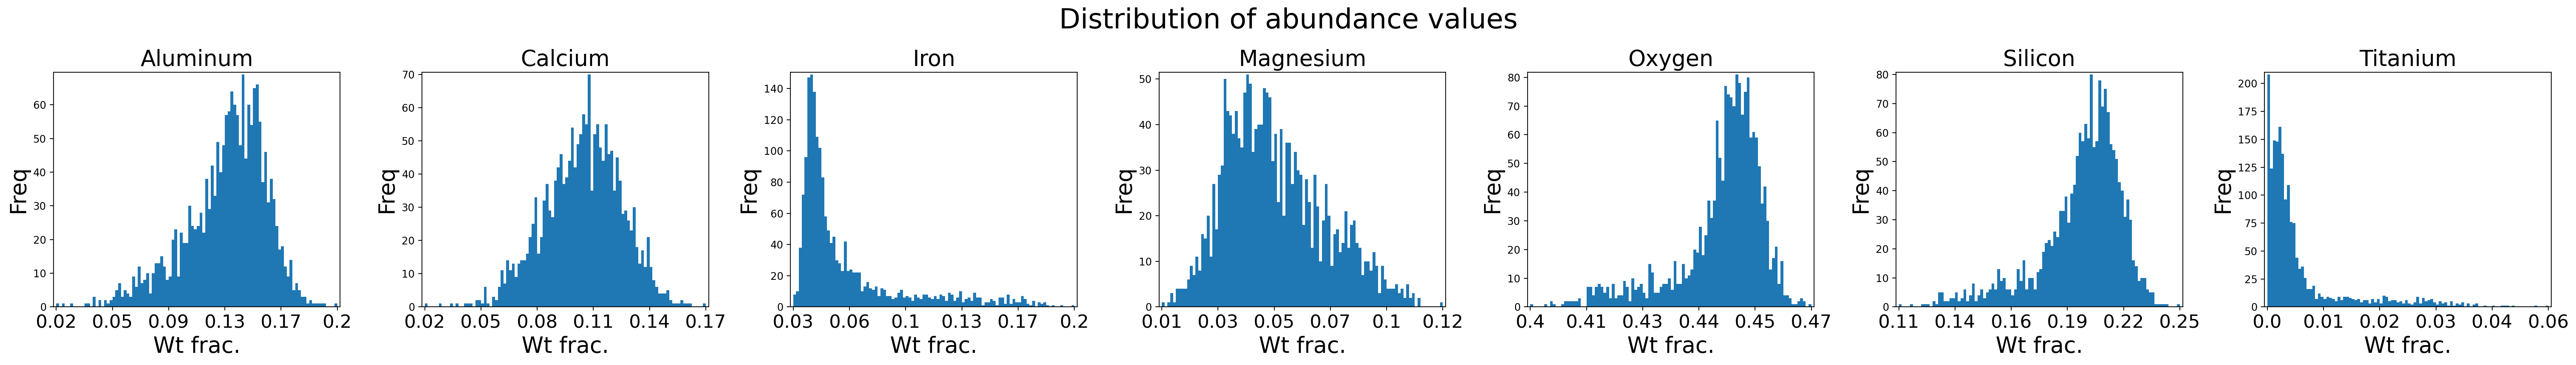

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

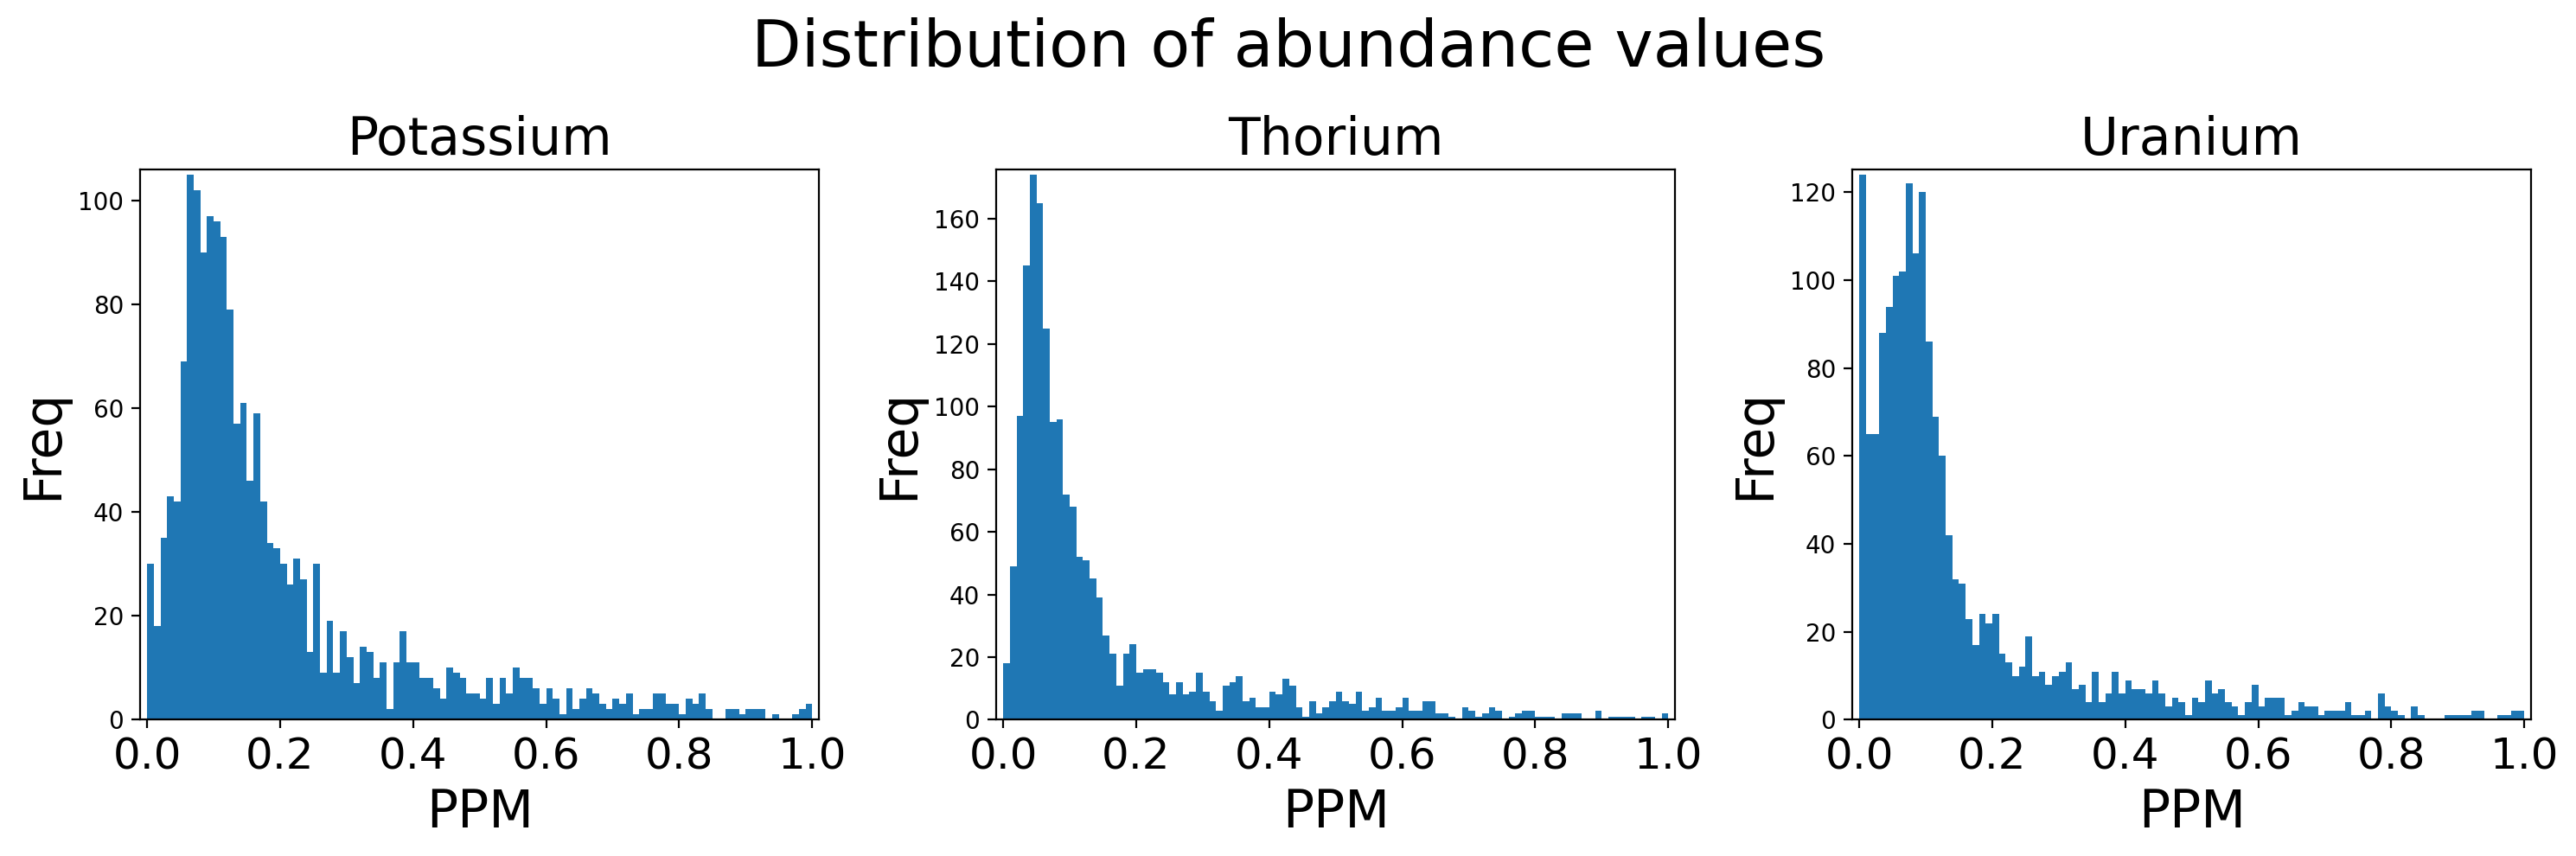

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

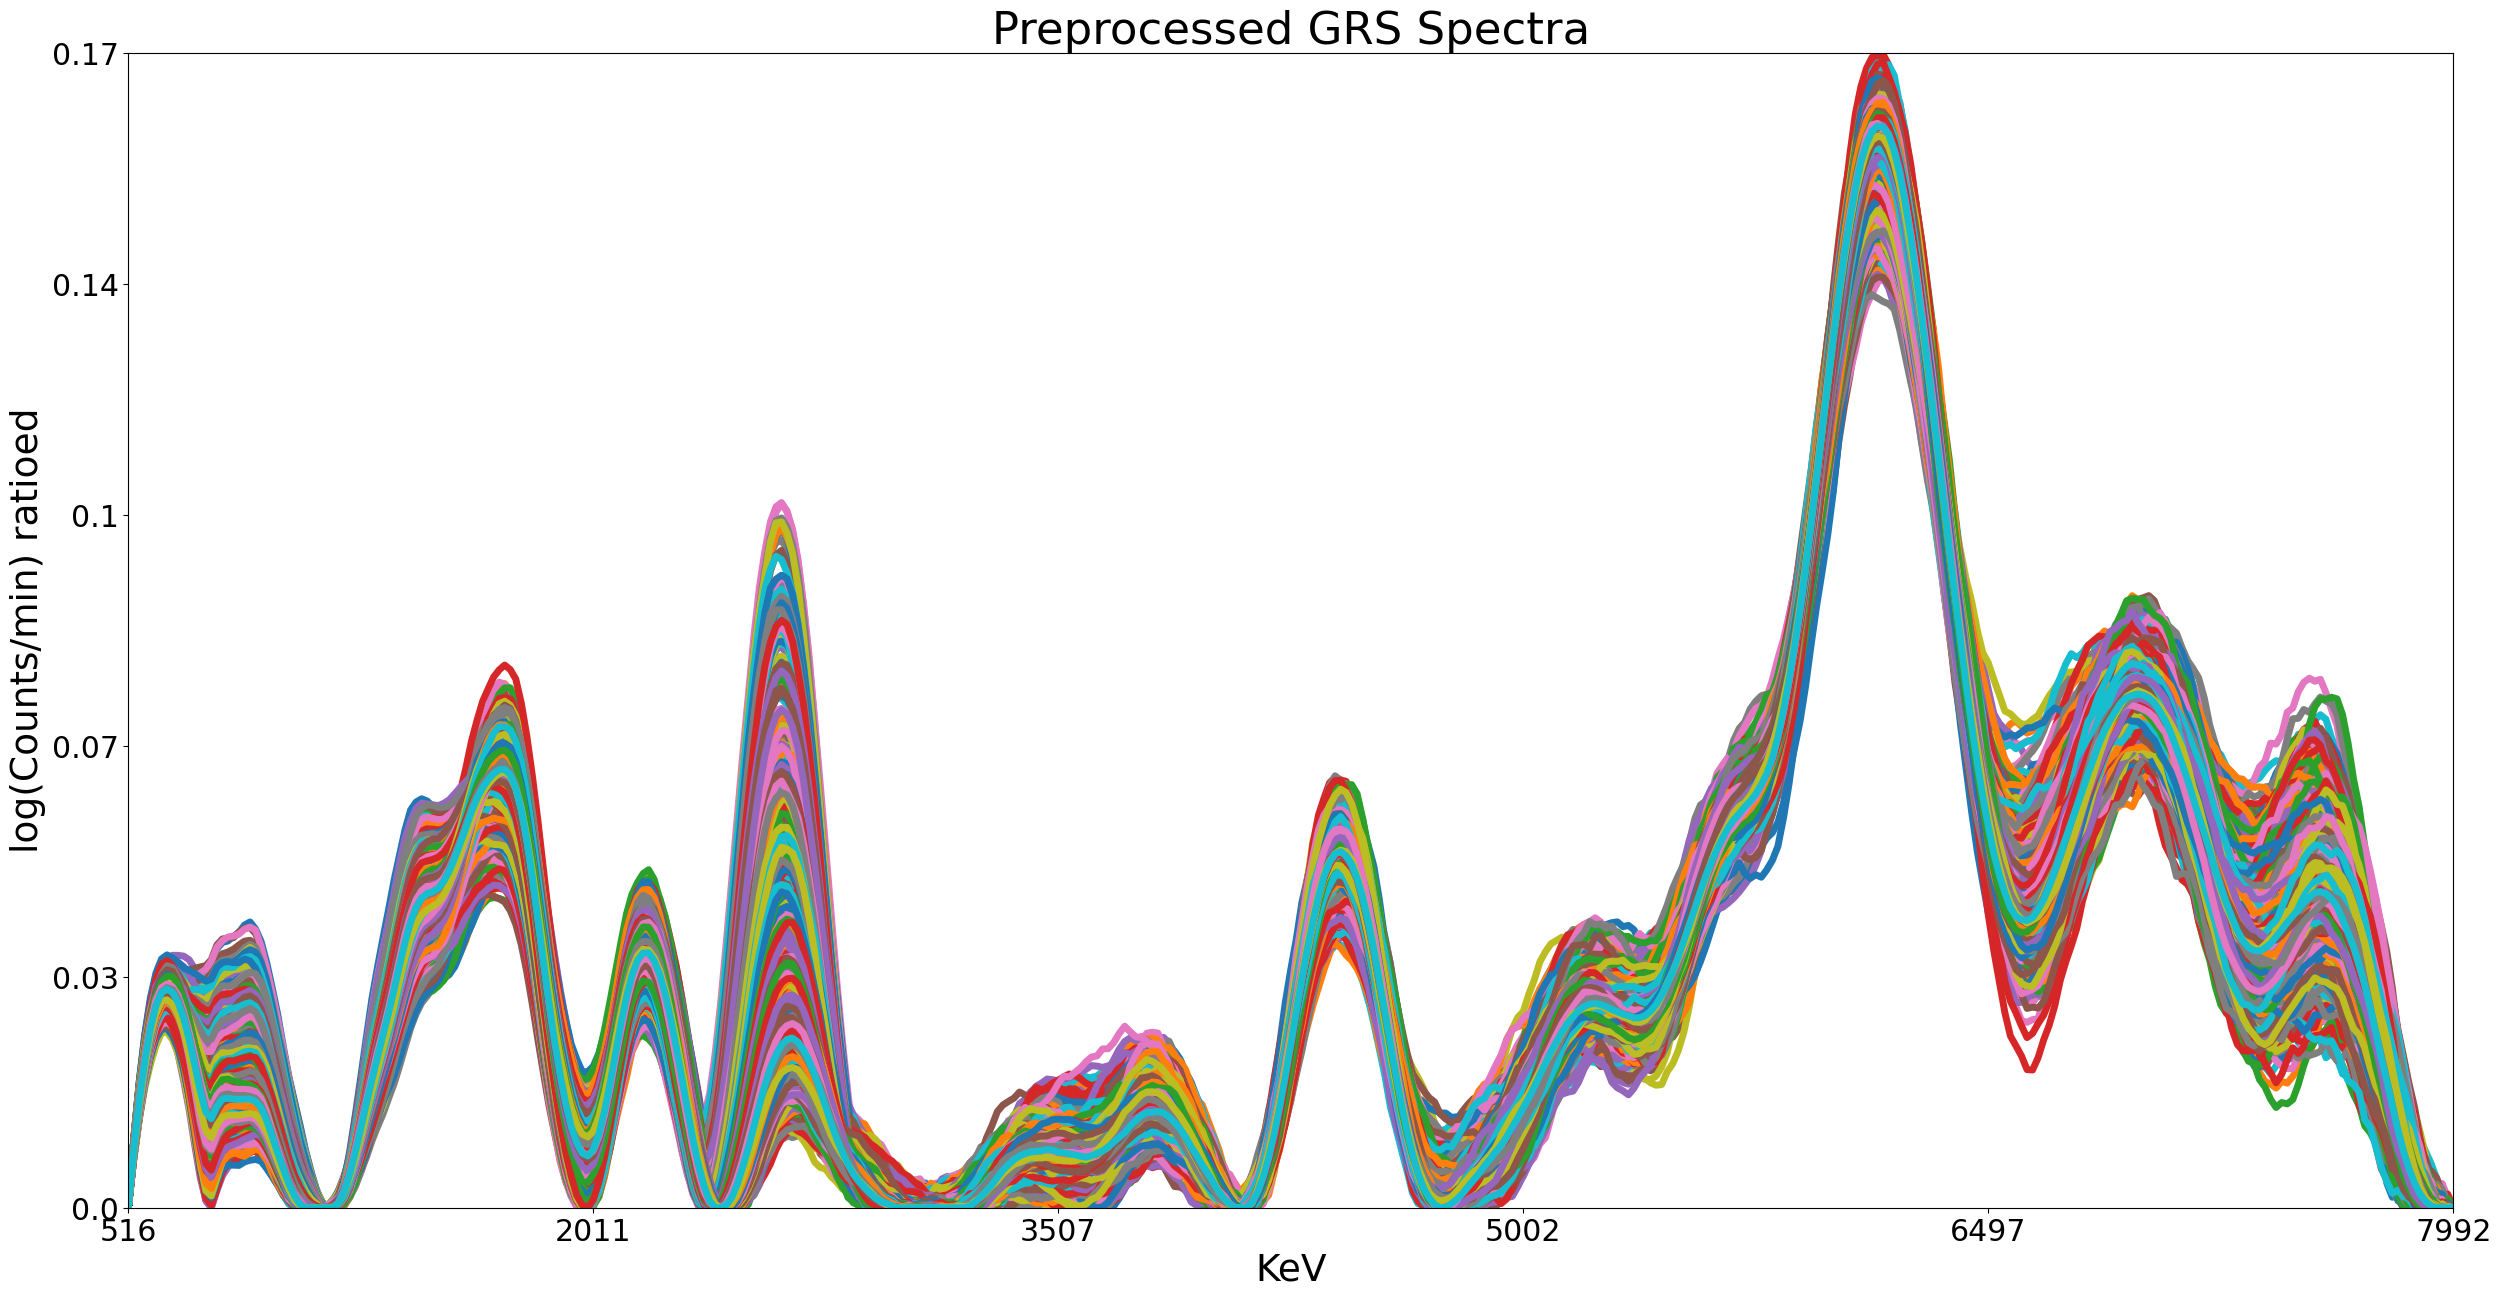

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

In [27]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [28]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [29]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, strideactivation function, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,activation,dropoutRate):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    reluActivation=tf.keras.layers.Activation(activation)
    #add the 1st activation layer to the graph
    volume=reluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(0.5,
                                              noise_shape=None,
                                              seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    return volume

In [30]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5,0.5]

In [31]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [32]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [33]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [34]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5]

In [35]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)


In [36]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 11264)


In [37]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [38]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [39]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [40]:
'''
#add a hidden layer to the nuclear elements' encoder
preElementNodes=tf.keras.layers.Dense(360,activation='relu')(nuclearElementFeatures)
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(preElementNodes)
'''
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [41]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [42]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class CompositeConstraint(tf.keras.constraints.Constraint):
    def __init__(self,constraints,name):
        self.constraints=constraints
        self.__name__=name
    def __call__(self, w):
        for constraint in self.constraints:
            w = constraint(w)
        return w

#create instances of the individual constraints to be applied
#non-negativity contraint
nonNegativityConstraint=tf.keras.constraints.NonNeg()
#unit norm constraint
unitNormConstraint=tf.keras.constraints.UnitNorm(axis=0)

#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=CompositeConstraint([nonNegativityConstraint,unitNormConstraint],name="unitNormCompositeConstraint")

In [43]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
for i in range(fullAbundanceEmbedding.shape[-1]):
    temp=tf.keras.layers.Dense(noOfChannels,activation=None,use_bias=False,kernel_constraint=unitNormNonNegetivityConstraint,name=allElementNames[i]+"_Spectra")(tf.expand_dims(fullAbundanceEmbedding[:,i],-1))
    elementWiseHiddenLayers.append(tf.expand_dims(temp,-1))
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {elementWiseHiddenLayers[-1].shape}")

Shape of the spectra outputed by Aluminum (None, 421, 1)
Shape of the spectra outputed by Calcium (None, 421, 1)
Shape of the spectra outputed by Iron (None, 421, 1)
Shape of the spectra outputed by Magnesium (None, 421, 1)
Shape of the spectra outputed by Oxygen (None, 421, 1)
Shape of the spectra outputed by Silicon (None, 421, 1)
Shape of the spectra outputed by Titanium (None, 421, 1)
Shape of the spectra outputed by Potassium (None, 421, 1)
Shape of the spectra outputed by Thorium (None, 421, 1)
Shape of the spectra outputed by Uranium (None, 421, 1)


In [44]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(tf.keras.layers.Concatenate(axis=-1)(elementWiseHiddenLayers),
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [45]:
#apply two dense layers to the network
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(linearMixedSpectra)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(nnGraph)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation=None,name="Reconstruced_Spectra")(nnGraph)

In [46]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      nnGraph],
                             name="Constrained_Dual_Encoder_Unmxing_Model")

In [47]:
#create the loss function for the embedding, Mean Squared Error
abundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,
                                   beta_1=0.5)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=32
#define cosine similarity as a metric

In [48]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,abundanceLossFunction,recontructedSpectraLoss],
                      loss_weights=[1e-2,1,1e-5],
                      metrics=[[pearson_correlation],[pearson_correlation],['cosine_similarity']],
                      steps_per_execution=45)

In [49]:
#set the address where the untrained model will be saved
untrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Constrainted_Dual_Unmixing_Model.h5"

In [50]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Constrainted_Dual_Unmixing_Model_Weights.h5"

In [51]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [52]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [53]:
#set no. of folds over which the model is to be validated
noOfFolds=5

In [54]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [55]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [56]:
#create a list to hold model training history
modelTrainingHistories=[]
#create a list to store the trained models
trainedModels=[]

In [59]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    if i==0:
        continue
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    '''
    #load the untrained model
    unmixingModel=tf.keras.models.load_model(untrainedModelAddress,
                                             custom_objects={"CompositeConstraint":CompositeConstraint([nonNegativityConstraint,unitNormConstraint],name="unitNormCompositeConstraint")},
                                             compile=True)
    '''
    
    
    unmixingModel.load_weights(untrainedModelWeightsAddress)
     #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=[abundanceLossFunction,
                                abundanceLossFunction,
                                recontructedSpectraLoss],
                          loss_weights=[1e-2,1,1e-5],
                          metrics=[[pearson_correlation],
                                   [pearson_correlation],
                                   ['cosine_similarity']],
                          steps_per_execution=45)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra[trainingIndices,:],
                                                            y=[regularElementalAbundances[trainingIndices,:],
                                                               nuclearElementalAbundances[trainingIndices,:],
                                                               preprocessedSpectra[trainingIndices,:]],
                                                            batch_size=batchSize,
                                                            epochs=noOfEpochs,
                                                            validation_data=(preprocessedSpectra[testingIndices,:],
                                                                             [regularElementalAbundances[testingIndices,:],
                                                                              nuclearElementalAbundances[testingIndices,:],
                                                                              preprocessedSpectra[testingIndices,:]]),
                                                            validation_freq=1)
                                                            
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    

    #set the address where the untrained model will be saved
    trainedModelWeightsAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/trained_Constrainted_Dual_Unmixing_Model_Weights_for_"+str(i+1)+"_Fold.h5"
    
    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)
    
    #save the trained model
    trainedModels.append(unmixingModel)
    

Starting processing fold 2
Epoch 1/2000
45/45 [==============================] - 10s 233ms/step - loss: 4.1646 - tf.math.divide_loss: 0.0029 - tf.math.abs_1_loss: 4.1646 - Reconstruced_Spectra_loss: -0.4651 - tf.math.divide_pearson_correlation: 0.9156 - tf.math.abs_1_pearson_correlation: -0.0285 - Reconstruced_Spectra_cosine_similarity: 0.4651 - val_loss: 0.0349 - val_tf.math.divide_loss: 0.0060 - val_tf.math.abs_1_loss: 0.0348 - val_Reconstruced_Spectra_loss: -0.7094 - val_tf.math.divide_pearson_correlation: 0.8810 - val_tf.math.abs_1_pearson_correlation: 0.1958 - val_Reconstruced_Spectra_cosine_similarity: 0.7094
Epoch 2/2000
45/45 [==============================] - 2s 38ms/step - loss: 2.2039 - tf.math.divide_loss: 9.3872e-04 - tf.math.abs_1_loss: 2.2039 - Reconstruced_Spectra_loss: -0.8122 - tf.math.divide_pearson_correlation: 0.9751 - tf.math.abs_1_pearson_correlation: -0.0053 - Reconstruced_Spectra_cosine_similarity: 0.8122 - val_loss: 0.0366 - val_tf.math.divide_loss: 0.0053 - v

Epoch 15/2000
45/45 [==============================] - 2s 44ms/step - loss: 0.4795 - tf.math.divide_loss: 3.2172e-04 - tf.math.abs_1_loss: 0.4795 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9915 - tf.math.abs_1_pearson_correlation: 0.0012 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0810 - val_tf.math.divide_loss: 2.5435e-04 - val_tf.math.abs_1_loss: 0.0810 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9942 - val_tf.math.abs_1_pearson_correlation: -0.2512 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 16/2000
45/45 [==============================] - 2s 42ms/step - loss: 0.4228 - tf.math.divide_loss: 3.0889e-04 - tf.math.abs_1_loss: 0.4228 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9918 - tf.math.abs_1_pearson_correlation: -0.0044 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0332 - val_tf.math.divide_loss: 2.3253e-04 - val_tf.math.abs_

Epoch 29/2000
45/45 [==============================] - 2s 46ms/step - loss: 0.1988 - tf.math.divide_loss: 2.5467e-04 - tf.math.abs_1_loss: 0.1988 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.0204 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0340 - val_tf.math.divide_loss: 1.7778e-04 - val_tf.math.abs_1_loss: 0.0340 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: -0.0313 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 30/2000
45/45 [==============================] - 2s 45ms/step - loss: 0.1897 - tf.math.divide_loss: 2.5739e-04 - tf.math.abs_1_loss: 0.1897 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: -0.0127 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0279 - val_tf.math.divide_loss: 1.7643e-04 - val_tf.math.abs_

Epoch 43/2000
45/45 [==============================] - 2s 46ms/step - loss: 0.1047 - tf.math.divide_loss: 2.2970e-04 - tf.math.abs_1_loss: 0.1047 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.1246 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0177 - val_tf.math.divide_loss: 1.6810e-04 - val_tf.math.abs_1_loss: 0.0177 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.4221 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 44/2000
45/45 [==============================] - 2s 45ms/step - loss: 0.1041 - tf.math.divide_loss: 2.2095e-04 - tf.math.abs_1_loss: 0.1041 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.1380 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0132 - val_tf.math.divide_loss: 1.6475e-04 - val_tf.math.abs_1_

Epoch 57/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0675 - tf.math.divide_loss: 2.0914e-04 - tf.math.abs_1_loss: 0.0675 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.2919 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0117 - val_tf.math.divide_loss: 1.6344e-04 - val_tf.math.abs_1_loss: 0.0117 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.6132 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 58/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0653 - tf.math.divide_loss: 2.0743e-04 - tf.math.abs_1_loss: 0.0653 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.2917 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.6201e-04 - val_tf.math.abs_1_

Epoch 71/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0478 - tf.math.divide_loss: 1.9643e-04 - tf.math.abs_1_loss: 0.0478 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.4360 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.5997e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9345 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 72/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0460 - tf.math.divide_loss: 1.9414e-04 - tf.math.abs_1_loss: 0.0460 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4419 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0084 - val_tf.math.divide_loss: 1.6110e-04 - val_tf.math.abs_1_

Epoch 85/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0331 - tf.math.divide_loss: 1.8878e-04 - tf.math.abs_1_loss: 0.0331 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5405 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0143 - val_tf.math.divide_loss: 1.5332e-04 - val_tf.math.abs_1_loss: 0.0143 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.4396 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 86/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0333 - tf.math.divide_loss: 1.8882e-04 - tf.math.abs_1_loss: 0.0333 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5726 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.5275e-04 - val_tf.math.abs_1_

Epoch 99/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0257 - tf.math.divide_loss: 1.8027e-04 - tf.math.abs_1_loss: 0.0257 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6325 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.5184e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9149 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 100/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0254 - tf.math.divide_loss: 1.7836e-04 - tf.math.abs_1_loss: 0.0254 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6480 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.4931e-04 - val_tf.math.abs_1

Epoch 113/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0197 - tf.math.divide_loss: 1.7233e-04 - tf.math.abs_1_loss: 0.0197 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7030 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0081 - val_tf.math.divide_loss: 1.4859e-04 - val_tf.math.abs_1_loss: 0.0081 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.6851 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 114/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0206 - tf.math.divide_loss: 1.7186e-04 - tf.math.abs_1_loss: 0.0206 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.6905 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0076 - val_tf.math.divide_loss: 1.5000e-04 - val_tf.math.abs_

Epoch 127/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0152 - tf.math.divide_loss: 1.6867e-04 - tf.math.abs_1_loss: 0.0152 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7638 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4618e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8623 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 128/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0158 - tf.math.divide_loss: 1.6740e-04 - tf.math.abs_1_loss: 0.0158 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7360 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4576e-04 - val_tf.math.abs_

Epoch 141/2000
45/45 [==============================] - 3s 78ms/step - loss: 0.0141 - tf.math.divide_loss: 1.6309e-04 - tf.math.abs_1_loss: 0.0141 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7859 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.4359e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.7819 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 142/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0136 - tf.math.divide_loss: 1.6204e-04 - tf.math.abs_1_loss: 0.0136 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7967 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.4514e-04 - val_tf.math.abs_

Epoch 155/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0106 - tf.math.divide_loss: 1.5967e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8068 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4285e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9134 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 156/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0112 - tf.math.divide_loss: 1.5984e-04 - tf.math.abs_1_loss: 0.0112 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8206 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0079 - val_tf.math.divide_loss: 1.4278e-04 - val_tf.math.abs_

Epoch 169/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0102 - tf.math.divide_loss: 1.5940e-04 - tf.math.abs_1_loss: 0.0102 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8499 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4262e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9034 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 170/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0099 - tf.math.divide_loss: 1.5848e-04 - tf.math.abs_1_loss: 0.0099 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8450 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.4351e-04 - val_tf.math.abs_

Epoch 183/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0090 - tf.math.divide_loss: 1.5696e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8579 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.4223e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8912 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 184/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0085 - tf.math.divide_loss: 1.5518e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8449 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3993e-04 - val_tf.math.abs_

Epoch 197/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5298e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8656 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3711e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9442 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 198/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5566e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8702 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3968e-04 - val_tf.math.abs_

Epoch 211/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0069 - tf.math.divide_loss: 1.5161e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8899 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3954e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8461 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 212/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0096 - tf.math.divide_loss: 1.5215e-04 - tf.math.abs_1_loss: 0.0096 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8691 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3632e-04 - val_tf.math.abs_

Epoch 225/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0083 - tf.math.divide_loss: 1.4678e-04 - tf.math.abs_1_loss: 0.0083 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8546 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3715e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8789 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 226/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0076 - tf.math.divide_loss: 1.4992e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8666 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3918e-04 - val_tf.math.abs_

Epoch 239/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0077 - tf.math.divide_loss: 1.4784e-04 - tf.math.abs_1_loss: 0.0077 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8880 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3851e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9372 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 240/2000
45/45 [==============================] - 5s 107ms/step - loss: 0.0070 - tf.math.divide_loss: 1.4974e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9012 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3727e-04 - val_tf.math.abs

Epoch 253/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0065 - tf.math.divide_loss: 1.4681e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9013 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3484e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8764 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 254/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4530e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9044 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3367e-04 - val_tf.math.abs_

Epoch 267/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4529e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9072 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3728e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9458 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 268/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0069 - tf.math.divide_loss: 1.4337e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8913 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3866e-04 - val_tf.math.abs_

Epoch 281/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4944e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9178 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3806e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9252 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 282/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4461e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9103 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3322e-04 - val_tf.math.abs_

Epoch 295/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4220e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9216 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3183e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9483 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 296/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4212e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9098 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3132e-04 - val_tf.math.abs_

Epoch 309/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4453e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9174 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3473e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9468 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 310/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4471e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9162 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3611e-04 - val_tf.math.abs_

Epoch 323/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4289e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9157 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3026e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9224 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 324/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4232e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9176 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3049e-04 - val_tf.math.abs_

Epoch 337/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4190e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9195 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.3254e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9508 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 338/2000
45/45 [==============================] - 4s 98ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4284e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9199 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3151e-04 - val_tf.math.abs_

Epoch 351/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3930e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2971e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 352/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3908e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9212 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3272e-04 - val_tf.math.abs_

Epoch 365/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4128e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9089 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3190e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9538 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 366/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3936e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9158 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3124e-04 - val_tf.math.abs_

Epoch 379/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3863e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9248 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3262e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9580 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 380/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3801e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9205 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2921e-04 - val_tf.math.abs_

Epoch 393/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3955e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2925e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9438 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 394/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3945e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3199e-04 - val_tf.math.abs_

Epoch 407/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4008e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9217 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3248e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9505 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 408/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3944e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9305 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2968e-04 - val_tf.math.abs_

Epoch 421/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3818e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9189 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3069e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8801 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 422/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3631e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9148 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3384e-04 - val_tf.math.abs_

Epoch 435/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3755e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9272 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2885e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9279 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 436/2000
45/45 [==============================] - 5s 118ms/step - loss: 0.0055 - tf.math.divide_loss: 1.3639e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9201 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2962e-04 - val_tf.math.abs

Epoch 449/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3880e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2921e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9507 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 450/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3821e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9213 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3218e-04 - val_tf.math.abs_

Epoch 463/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3731e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9234 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2664e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9478 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 464/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3769e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9306 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2994e-04 - val_tf.math.abs_

Epoch 477/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3667e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9373 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2631e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9302 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 478/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3627e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2990e-04 - val_tf.math.abs_

Epoch 491/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3658e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9394 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2873e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 492/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3407e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9339 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2697e-04 - val_tf.math.abs_

Epoch 505/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3406e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9306 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2707e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9572 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 506/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3527e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2871e-04 - val_tf.math.abs_

Epoch 519/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3488e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9287 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2857e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9303 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 520/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3132e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9265 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2862e-04 - val_tf.math.abs_

Epoch 533/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3559e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9267 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2849e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9363 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 534/2000
45/45 [==============================] - 4s 96ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3578e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9308 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2897e-04 - val_tf.math.abs_

Epoch 547/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3477e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2609e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 548/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3264e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9386 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2787e-04 - val_tf.math.abs_

Epoch 561/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3496e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9377 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2812e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9523 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 562/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3429e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2696e-04 - val_tf.math.abs_

Epoch 575/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3406e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2726e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9498 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 576/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3440e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9391 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2572e-04 - val_tf.math.abs_

Epoch 589/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3369e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2754e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9176 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 590/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3290e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2661e-04 - val_tf.math.abs_

Epoch 603/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3263e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9468 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 604/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3029e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2798e-04 - val_tf.math.abs_

Epoch 617/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3318e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9454 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2866e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9373 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 618/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3445e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2885e-04 - val_tf.math.abs_

Epoch 631/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3260e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9337 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2689e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9404 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 632/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3053e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2582e-04 - val_tf.math.abs_

Epoch 645/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3344e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2697e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9458 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 646/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3388e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2713e-04 - val_tf.math.abs_

Epoch 659/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3117e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9357 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2917e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 660/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3179e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9382 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2356e-04 - val_tf.math.abs_

Epoch 673/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3227e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.2531e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.8334 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 674/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3324e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9405 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2659e-04 - val_tf.math.abs_

Epoch 687/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3296e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9551 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2777e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9583 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 688/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3218e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9480 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2811e-04 - val_tf.math.abs_

Epoch 701/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3025e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9409 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2645e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9529 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 702/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3057e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9444 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2603e-04 - val_tf.math.abs_

Epoch 715/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3109e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9455 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2798e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9483 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 716/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3101e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2527e-04 - val_tf.math.abs_

Epoch 729/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3106e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2372e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9406 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 730/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3186e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2529e-04 - val_tf.math.abs_

Epoch 743/2000
45/45 [==============================] - 4s 96ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3024e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9402 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2525e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.8866 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 744/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3035e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9388 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2622e-04 - val_tf.math.abs_

Epoch 757/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3098e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2510e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9523 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 758/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3155e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9481 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2242e-04 - val_tf.math.abs_

Epoch 771/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2941e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9424 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2608e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9364 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 772/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3011e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2506e-04 - val_tf.math.abs_

Epoch 785/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3045e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2675e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9565 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 786/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2908e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9439 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2402e-04 - val_tf.math.abs_

Epoch 799/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3175e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9400 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2518e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9314 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 800/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2921e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9489 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2256e-04 - val_tf.math.abs_

Epoch 813/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2976e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2503e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9584 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 814/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3188e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2305e-04 - val_tf.math.abs_

Epoch 827/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2870e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2527e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9627 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 828/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2885e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2354e-04 - val_tf.math.abs_

Epoch 841/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2975e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2439e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9529 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 842/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2739e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2441e-04 - val_tf.math.abs_

Epoch 855/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2998e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2627e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9429 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 856/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2902e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2881e-04 - val_tf.math.abs_

Epoch 869/2000
45/45 [==============================] - 5s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3040e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2463e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 870/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2847e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9462 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2625e-04 - val_tf.math.abs

Epoch 883/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3016e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2405e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 884/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2816e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9530 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2593e-04 - val_tf.math.abs_

Epoch 897/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2774e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2689e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9392 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 898/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2920e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2407e-04 - val_tf.math.abs_

Epoch 911/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3213e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2457e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9526 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 912/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2790e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9429 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2359e-04 - val_tf.math.abs_

Epoch 925/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2898e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2330e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 926/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2880e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2495e-04 - val_tf.math.abs_

Epoch 939/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2742e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2269e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 940/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2866e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9483 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2429e-04 - val_tf.math.abs_

Epoch 953/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2939e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2583e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9604 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 954/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2911e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2306e-04 - val_tf.math.abs_

Epoch 967/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2734e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2408e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9223 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 968/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2921e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.abs_

Epoch 981/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2622e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2562e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 982/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2901e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2603e-04 - val_tf.math.abs_

Epoch 995/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2739e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2658e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9506 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 996/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2832e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2311e-04 - val_tf.math.abs_

Epoch 1009/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2512e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2358e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9598 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1010/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2763e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2168e-04 - val_tf.math.ab

Epoch 1023/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2320e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9191 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1024/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2945e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2266e-04 - val_tf.math.ab

Epoch 1037/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2716e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2154e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9301 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1038/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2592e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2574e-04 - val_tf.math.ab

Epoch 1051/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2779e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2263e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9362 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1052/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2750e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2343e-04 - val_tf.math.ab

Epoch 1065/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2924e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2274e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1066/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2660e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2417e-04 - val_tf.math.ab

Epoch 1079/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2643e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2147e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9021 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1080/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2655e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2108e-04 - val_tf.math.ab

Epoch 1093/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2912e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9582 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2279e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1094/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2889e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2357e-04 - val_tf.math.ab

Epoch 1107/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2666e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2191e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1108/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2628e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2228e-04 - val_tf.math.ab

Epoch 1121/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2660e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2052e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9638 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1122/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2722e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2404e-04 - val_tf.math.ab

Epoch 1135/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2658e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9549 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2279e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9437 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1136/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2585e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9515 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2320e-04 - val_tf.math.ab

Epoch 1149/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2427e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2257e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1150/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2691e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2279e-04 - val_tf.math.ab

Epoch 1163/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2647e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9551 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2020e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9548 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1164/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9549 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.ab

Epoch 1177/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2671e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9587 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2336e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1178/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2486e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1921e-04 - val_tf.math.ab

Epoch 1191/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2664e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2203e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9637 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1192/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2477e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2491e-04 - val_tf.math.ab

Epoch 1205/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2705e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2618e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9597 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1206/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2310e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2285e-04 - val_tf.math.ab

Epoch 1219/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2495e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2370e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9542 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1220/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2695e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2011e-04 - val_tf.math.ab

Epoch 1233/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2561e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2525e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9285 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1234/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2409e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2032e-04 - val_tf.math.ab

Epoch 1247/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2463e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2299e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9447 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1248/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2560e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.ab

Epoch 1261/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2674e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2066e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9581 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1262/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2595e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9602 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1977e-04 - val_tf.math.ab

Epoch 1275/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2291e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1276/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2539e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2147e-04 - val_tf.math.ab

Epoch 1289/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2485e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1982e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9525 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1290/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2788e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2262e-04 - val_tf.math.ab

Epoch 1303/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2594e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2392e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9604 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1304/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2462e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2405e-04 - val_tf.math.ab

Epoch 1317/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2297e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9592 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1899e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9497 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1318/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2189e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2191e-04 - val_tf.math.ab

Epoch 1331/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2693e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9569 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2524e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9571 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1332/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2386e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2057e-04 - val_tf.math.ab

Epoch 1345/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2441e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2112e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9194 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1346/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2111e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9586 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2014e-04 - val_tf.math.ab

Epoch 1359/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2505e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9595 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1859e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1360/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2498e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2289e-04 - val_tf.math.ab

Epoch 1373/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2520e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2000e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9321 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1374/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2393e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9611 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1777e-04 - val_tf.math.ab

Epoch 1387/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2217e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2188e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1388/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2196e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1883e-04 - val_tf.math.ab

Epoch 1401/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2453e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2130e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9416 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1402/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2556e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2091e-04 - val_tf.math.ab

Epoch 1415/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2486e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2462e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9573 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1416/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2371e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9646 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2460e-04 - val_tf.math.ab

Epoch 1429/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2259e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9647 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2333e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9596 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1430/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2371e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1780e-04 - val_tf.math.ab

Epoch 1443/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2621e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9619 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1981e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9602 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1444/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2413e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1752e-04 - val_tf.math.ab

Epoch 1457/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2287e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9649 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2295e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9452 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1458/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2454e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.ab

Epoch 1471/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2103e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2050e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9537 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1472/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2199e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.ab

Epoch 1485/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2338e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9644 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1486/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2251e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1976e-04 - val_tf.math.ab

Epoch 1499/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2274e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2022e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1500/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2317e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1799e-04 - val_tf.math.ab

Epoch 1513/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2170e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2007e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9596 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1514/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2218e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2083e-04 - val_tf.math.ab

Epoch 1527/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2544e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1747e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1528/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2189e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.ab

Epoch 1541/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2175e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1858e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9657 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1542/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2492e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9649 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1966e-04 - val_tf.math.ab

Epoch 1555/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2279e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2081e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1556/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2169e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9616 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2311e-04 - val_tf.math.ab

Epoch 1569/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2359e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1835e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1570/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2362e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1972e-04 - val_tf.math.ab

Epoch 1583/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2278e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2206e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1584/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2169e-04 - val_tf.math.ab

Epoch 1597/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2284e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2089e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1598/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2348e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2288e-04 - val_tf.math.ab

Epoch 1611/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2337e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2049e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9310 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1612/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2107e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.ab

Epoch 1625/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2183e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9653 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1892e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9642 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1626/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2231e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1714e-04 - val_tf.math.ab

Epoch 1639/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2290e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1863e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9260 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1640/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2234e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1867e-04 - val_tf.math.ab

Epoch 1653/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2284e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9699 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1804e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9519 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1654/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2452e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1928e-04 - val_tf.math.ab

Epoch 1667/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2382e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1861e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9613 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1668/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2350e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1933e-04 - val_tf.math.ab

Epoch 1681/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2205e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2166e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9364 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1682/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2430e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1812e-04 - val_tf.math.ab

Epoch 1695/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2336e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9695 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1811e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9474 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1696/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2228e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1806e-04 - val_tf.math.ab

Epoch 1709/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2404e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9702 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2009e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9651 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1710/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2160e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1779e-04 - val_tf.math.ab

Epoch 1723/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2168e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1672e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9291 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1724/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2120e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1711e-04 - val_tf.math.ab

Epoch 1737/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2301e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1754e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9566 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1738/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2497e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1727e-04 - val_tf.math.ab

Epoch 1751/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2228e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1752/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2271e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1738e-04 - val_tf.math.ab

Epoch 1765/2000
45/45 [==============================] - 5s 104ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2424e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1835e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9627 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1766/2000
45/45 [==============================] - 6s 125ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2362e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9699 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1588e-04 - val_tf.math.

Epoch 1779/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2289e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9720 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1996e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1780/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2151e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1767e-04 - val_tf.math.ab

Epoch 1793/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2061e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1731e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9675 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1794/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2078e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1968e-04 - val_tf.math.ab

Epoch 1807/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1908e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1716e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1808/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2112e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1782e-04 - val_tf.math.ab

Epoch 1821/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2253e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9702 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1703e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9607 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1822/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2336e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1855e-04 - val_tf.math.ab

Epoch 1835/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2041e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9699 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1867e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9384 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1836/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2200e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9709 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2045e-04 - val_tf.math.ab

Epoch 1849/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2186e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9665 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1791e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9584 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1850/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1995e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1633e-04 - val_tf.math.ab

Epoch 1863/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2472e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1797e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1864/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2228e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9740 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.ab

Epoch 1877/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2227e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1693e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9586 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1878/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1959e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9700 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1802e-04 - val_tf.math.ab

Epoch 1891/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1892e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9701 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1788e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1892/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2033e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9693 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1716e-04 - val_tf.math.ab

Epoch 1905/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2176e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1590e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9581 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1906/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2047e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1489e-04 - val_tf.math.ab

Epoch 1919/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2229e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9699 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1433e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9540 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1920/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1947e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1612e-04 - val_tf.math.ab

Epoch 1933/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2190e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9546 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1934/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1886e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9699 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1615e-04 - val_tf.math.ab

Epoch 1947/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2138e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9737 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1969e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9557 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1948/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2129e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9718 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1624e-04 - val_tf.math.ab

Epoch 1961/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2150e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9720 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1557e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9578 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1962/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2125e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9712 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1574e-04 - val_tf.math.ab

Epoch 1975/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2210e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1976/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2308e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1807e-04 - val_tf.math.ab

Epoch 1989/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1859e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9694 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1571e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9574 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1990/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2257e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1773e-04 - val_tf.math.ab

Epoch 3/2000
45/45 [==============================] - 3s 62ms/step - loss: 1.7168 - tf.math.divide_loss: 7.3285e-04 - tf.math.abs_1_loss: 1.7168 - Reconstruced_Spectra_loss: -0.9335 - tf.math.divide_pearson_correlation: 0.9806 - tf.math.abs_1_pearson_correlation: 0.0099 - Reconstruced_Spectra_cosine_similarity: 0.9335 - val_loss: 0.1717 - val_tf.math.divide_loss: 0.0021 - val_tf.math.abs_1_loss: 0.1717 - val_Reconstruced_Spectra_loss: -0.9624 - val_tf.math.divide_pearson_correlation: 0.9580 - val_tf.math.abs_1_pearson_correlation: -0.1813 - val_Reconstruced_Spectra_cosine_similarity: 0.9624
Epoch 4/2000
45/45 [==============================] - 3s 64ms/step - loss: 1.4825 - tf.math.divide_loss: 6.1101e-04 - tf.math.abs_1_loss: 1.4825 - Reconstruced_Spectra_loss: -0.9751 - tf.math.divide_pearson_correlation: 0.9838 - tf.math.abs_1_pearson_correlation: -0.0243 - Reconstruced_Spectra_cosine_similarity: 0.9751 - val_loss: 0.1098 - val_tf.math.divide_loss: 0.0019 - val_tf.math.abs_1_loss: 0.

Epoch 17/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.3956 - tf.math.divide_loss: 3.2318e-04 - tf.math.abs_1_loss: 0.3956 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9914 - tf.math.abs_1_pearson_correlation: -0.0209 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0421 - val_tf.math.divide_loss: 2.1106e-04 - val_tf.math.abs_1_loss: 0.0421 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9948 - val_tf.math.abs_1_pearson_correlation: 0.0506 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 18/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.3420 - tf.math.divide_loss: 3.1354e-04 - tf.math.abs_1_loss: 0.3420 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9917 - tf.math.abs_1_pearson_correlation: -0.0363 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0466 - val_tf.math.divide_loss: 2.0465e-04 - val_tf.math.abs_

Epoch 31/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.1589 - tf.math.divide_loss: 2.5434e-04 - tf.math.abs_1_loss: 0.1589 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.0291 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0384 - val_tf.math.divide_loss: 1.7377e-04 - val_tf.math.abs_1_loss: 0.0384 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: -0.0441 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 32/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.1554 - tf.math.divide_loss: 2.6173e-04 - tf.math.abs_1_loss: 0.1554 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9931 - tf.math.abs_1_pearson_correlation: 9.7902e-04 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0328 - val_tf.math.divide_loss: 1.7177e-04 - val_tf.math.a

Epoch 45/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0832 - tf.math.divide_loss: 2.2609e-04 - tf.math.abs_1_loss: 0.0833 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.1361 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0176 - val_tf.math.divide_loss: 1.6534e-04 - val_tf.math.abs_1_loss: 0.0176 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.6971 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 46/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0868 - tf.math.divide_loss: 2.2850e-04 - tf.math.abs_1_loss: 0.0868 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.1263 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0290 - val_tf.math.divide_loss: 1.6885e-04 - val_tf.math.abs_1_

Epoch 59/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0567 - tf.math.divide_loss: 2.1503e-04 - tf.math.abs_1_loss: 0.0567 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.3265 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0080 - val_tf.math.divide_loss: 1.6012e-04 - val_tf.math.abs_1_loss: 0.0080 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8620 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 60/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0583 - tf.math.divide_loss: 2.1277e-04 - tf.math.abs_1_loss: 0.0583 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.2707 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0150 - val_tf.math.divide_loss: 1.5943e-04 - val_tf.math.abs_1_

Epoch 73/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0438 - tf.math.divide_loss: 1.9691e-04 - tf.math.abs_1_loss: 0.0438 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.4388 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.5948e-04 - val_tf.math.abs_1_loss: 0.0069 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8993 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 74/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0413 - tf.math.divide_loss: 2.0042e-04 - tf.math.abs_1_loss: 0.0413 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.4388 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0085 - val_tf.math.divide_loss: 1.5580e-04 - val_tf.math.abs_1_

Epoch 87/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0307 - tf.math.divide_loss: 1.8920e-04 - tf.math.abs_1_loss: 0.0307 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5428 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.5456e-04 - val_tf.math.abs_1_loss: 0.0075 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7047 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 88/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0308 - tf.math.divide_loss: 1.9235e-04 - tf.math.abs_1_loss: 0.0308 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5418 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0114 - val_tf.math.divide_loss: 1.5435e-04 - val_tf.math.abs_1_

Epoch 101/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0230 - tf.math.divide_loss: 1.7722e-04 - tf.math.abs_1_loss: 0.0230 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6339 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.5146e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8132 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 102/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0237 - tf.math.divide_loss: 1.8451e-04 - tf.math.abs_1_loss: 0.0237 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6277 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.5200e-04 - val_tf.math.abs_

Epoch 115/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0187 - tf.math.divide_loss: 1.7531e-04 - tf.math.abs_1_loss: 0.0187 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6841 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.5011e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8988 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 116/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0178 - tf.math.divide_loss: 1.7627e-04 - tf.math.abs_1_loss: 0.0179 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7063 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.5035e-04 - val_tf.math.abs_

Epoch 129/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0146 - tf.math.divide_loss: 1.7118e-04 - tf.math.abs_1_loss: 0.0146 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7618 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.5011e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9028 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 130/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0148 - tf.math.divide_loss: 1.6937e-04 - tf.math.abs_1_loss: 0.0148 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7412 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4971e-04 - val_tf.math.abs_

Epoch 143/2000
45/45 [==============================] - 5s 104ms/step - loss: 0.0121 - tf.math.divide_loss: 1.6828e-04 - tf.math.abs_1_loss: 0.0122 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7923 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4555e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.7811 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 144/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0122 - tf.math.divide_loss: 1.6732e-04 - tf.math.abs_1_loss: 0.0122 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7951 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4737e-04 - val_tf.math.abs

Epoch 157/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0109 - tf.math.divide_loss: 1.6390e-04 - tf.math.abs_1_loss: 0.0109 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8241 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4481e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8543 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 158/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0116 - tf.math.divide_loss: 1.6425e-04 - tf.math.abs_1_loss: 0.0116 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8083 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4831e-04 - val_tf.math.abs_

Epoch 171/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0101 - tf.math.divide_loss: 1.5927e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8410 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4459e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8845 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 172/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0097 - tf.math.divide_loss: 1.5958e-04 - tf.math.abs_1_loss: 0.0097 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8357 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.4470e-04 - val_tf.math.abs_

Epoch 185/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5511e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8515 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.4176e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8466 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 186/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0089 - tf.math.divide_loss: 1.5709e-04 - tf.math.abs_1_loss: 0.0089 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8503 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4347e-04 - val_tf.math.abs_

Epoch 199/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5266e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8747 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.4340e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8515 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 200/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0077 - tf.math.divide_loss: 1.5378e-04 - tf.math.abs_1_loss: 0.0077 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8643 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.4214e-04 - val_tf.math.abs_

Epoch 213/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0071 - tf.math.divide_loss: 1.5113e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8810 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3855e-04 - val_tf.math.abs_1_loss: 0.0070 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8572 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 214/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0067 - tf.math.divide_loss: 1.5713e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8925 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3913e-04 - val_tf.math.abs_

Epoch 227/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0062 - tf.math.divide_loss: 1.5008e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8981 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3748e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9331 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 228/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0066 - tf.math.divide_loss: 1.5098e-04 - tf.math.abs_1_loss: 0.0066 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8957 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3898e-04 - val_tf.math.abs_

Epoch 241/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4966e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8956 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3760e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9314 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 242/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4765e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9094 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3845e-04 - val_tf.math.abs_

Epoch 255/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4853e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9070 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3634e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9243 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 256/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4972e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9046 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4041e-04 - val_tf.math.abs_

Epoch 269/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4589e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8978 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3604e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9105 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 270/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4689e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9086 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3754e-04 - val_tf.math.abs_

Epoch 283/2000
45/45 [==============================] - 3s 78ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4501e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9222 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3509e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9353 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 284/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4336e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9178 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3639e-04 - val_tf.math.abs_

Epoch 297/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4605e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9217 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3456e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9375 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 298/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4444e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9162 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3473e-04 - val_tf.math.abs_

Epoch 311/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4296e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9155 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3224e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9092 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 312/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4754e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9196 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3367e-04 - val_tf.math.abs_

Epoch 325/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4391e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9181 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.3287e-04 - val_tf.math.abs_1_loss: 0.0067 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9099 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 326/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4249e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9181 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3429e-04 - val_tf.math.abs_

Epoch 339/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4196e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9291 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3272e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9327 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 340/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4088e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9228 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3235e-04 - val_tf.math.abs_

Epoch 353/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4035e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9342 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3245e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9306 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 354/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4061e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9308 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3288e-04 - val_tf.math.abs_

Epoch 367/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3856e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9335 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9371 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 368/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4038e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9390 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3166e-04 - val_tf.math.abs_

Epoch 381/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3964e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9425 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3314e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9248 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 382/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4133e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9363 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3405e-04 - val_tf.math.abs_

Epoch 395/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3815e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9394 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3107e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9277 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 396/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3899e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3169e-04 - val_tf.math.abs_

Epoch 409/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3930e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9430 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3165e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9315 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 410/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3814e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.2945e-04 - val_tf.math.abs_

Epoch 423/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3952e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9439 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3257e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9325 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 424/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3898e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3020e-04 - val_tf.math.abs_

Epoch 437/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3697e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9362 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2967e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9447 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 438/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3912e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9456 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3075e-04 - val_tf.math.abs_

Epoch 451/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3641e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9480 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2893e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9297 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 452/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4249e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3149e-04 - val_tf.math.abs_

Epoch 465/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3596e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2926e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9498 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 466/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3816e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9474 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2726e-04 - val_tf.math.abs_

Epoch 479/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3595e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9472 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2773e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9513 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 480/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3597e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.2794e-04 - val_tf.math.abs_

Epoch 493/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3421e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2903e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 494/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3663e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2745e-04 - val_tf.math.abs_

Epoch 507/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3590e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9541 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2845e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9443 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 508/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3397e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2685e-04 - val_tf.math.abs_

Epoch 521/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3664e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2737e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9390 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 522/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3620e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2787e-04 - val_tf.math.abs_

Epoch 535/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3306e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3089e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9433 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 536/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3402e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2635e-04 - val_tf.math.abs_

Epoch 549/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3411e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2829e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9432 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 550/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3490e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2613e-04 - val_tf.math.abs_

Epoch 563/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3901e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9569 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2710e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9225 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 564/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3574e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.2858e-04 - val_tf.math.abs_

Epoch 577/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3421e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.2722e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9398 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 578/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3535e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2757e-04 - val_tf.math.abs_

Epoch 591/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3490e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2527e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9495 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 592/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3428e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9551 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2453e-04 - val_tf.math.abs_

Epoch 605/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3274e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9587 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2953e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9530 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 606/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3443e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2496e-04 - val_tf.math.abs_

Epoch 619/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3404e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2540e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 620/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3303e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9586 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2441e-04 - val_tf.math.abs_

Epoch 633/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3630e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2424e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9460 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 634/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3293e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9606 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2712e-04 - val_tf.math.abs_

Epoch 647/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3418e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9606 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2487e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9404 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 648/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3512e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2361e-04 - val_tf.math.abs_

Epoch 661/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3325e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9598 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2767e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9510 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 662/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3194e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2605e-04 - val_tf.math.abs_

Epoch 675/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3303e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9602 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2461e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9457 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 676/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3069e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2561e-04 - val_tf.math.abs_

Epoch 689/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3246e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2795e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9411 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 690/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3258e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2626e-04 - val_tf.math.abs_

Epoch 703/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3247e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2343e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9389 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 704/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3278e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2359e-04 - val_tf.math.abs_

Epoch 717/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3241e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2514e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9269 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 718/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3071e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_

Epoch 731/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3328e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9659 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2541e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9473 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 732/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3044e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2488e-04 - val_tf.math.abs_

Epoch 745/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3056e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2239e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9405 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 746/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3217e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2572e-04 - val_tf.math.abs_

Epoch 759/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3052e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2520e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9339 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 760/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3068e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2731e-04 - val_tf.math.abs_

Epoch 773/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3216e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2597e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 774/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3114e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9646 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.2312e-04 - val_tf.math.abs_

Epoch 787/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2996e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9502 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 788/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3010e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2334e-04 - val_tf.math.abs_

Epoch 801/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3296e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9352 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 802/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2946e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2229e-04 - val_tf.math.abs_

Epoch 815/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3278e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9626 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2206e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9396 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 816/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3114e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9626 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2174e-04 - val_tf.math.abs_

Epoch 829/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3041e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2275e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9366 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 830/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2992e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2253e-04 - val_tf.math.abs_

Epoch 843/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3120e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2555e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9513 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 844/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2852e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.2120e-04 - val_tf.math.abs_

Epoch 857/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2854e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2083e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9486 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 858/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2982e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2211e-04 - val_tf.math.abs_

Epoch 871/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2881e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2536e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9569 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 872/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2884e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2078e-04 - val_tf.math.abs_

Epoch 885/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2894e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9511 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 886/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3218e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9650 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2238e-04 - val_tf.math.abs_

Epoch 899/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2734e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.2022e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9358 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 900/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2937e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9659 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2178e-04 - val_tf.math.abs_

Epoch 913/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2709e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9684 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2135e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9516 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 914/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2950e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2137e-04 - val_tf.math.abs_

Epoch 927/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2823e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2108e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9459 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 928/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2846e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2064e-04 - val_tf.math.abs_

Epoch 941/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2816e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2318e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9563 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 942/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2744e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9650 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2370e-04 - val_tf.math.abs_

Epoch 955/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2767e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2582e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9380 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 956/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2700e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9626 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2443e-04 - val_tf.math.abs_

Epoch 969/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2699e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2110e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9463 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 970/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2799e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9702 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2288e-04 - val_tf.math.abs_

Epoch 983/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2828e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2212e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9502 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 984/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2931e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2299e-04 - val_tf.math.abs_

Epoch 997/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2851e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9564 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 998/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2781e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2138e-04 - val_tf.math.abs_

Epoch 1011/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2537e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9616 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1997e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9476 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1012/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2697e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2072e-04 - val_tf.math.ab

Epoch 1025/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2767e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2067e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1026/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2925e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2281e-04 - val_tf.math.ab

Epoch 1039/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2991e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2313e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9413 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1040/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2745e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2079e-04 - val_tf.math.ab

Epoch 1053/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2823e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2047e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9495 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1054/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2698e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2113e-04 - val_tf.math.ab

Epoch 1067/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2692e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2046e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9424 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1068/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2785e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9649 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1928e-04 - val_tf.math.ab

Epoch 1081/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2017e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9583 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1082/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2831e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1859e-04 - val_tf.math.ab

Epoch 1095/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2655e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2140e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9307 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1096/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2540e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2018e-04 - val_tf.math.ab

Epoch 1109/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2615e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9692 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2097e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9539 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1110/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2509e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2111e-04 - val_tf.math.ab

Epoch 1123/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2661e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1953e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1124/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2641e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.ab

Epoch 1137/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2583e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9694 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1909e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9354 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1138/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2568e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9647 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.ab

Epoch 1151/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2570e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1927e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1152/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2651e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1981e-04 - val_tf.math.ab

Epoch 1165/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2703e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1948e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9561 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1166/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2647e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9677 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1900e-04 - val_tf.math.ab

Epoch 1179/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2752e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1891e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9478 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1180/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2525e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1971e-04 - val_tf.math.ab

Epoch 1193/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2662e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2049e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9506 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1194/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2642e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2251e-04 - val_tf.math.ab

Epoch 1207/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2617e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2228e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9512 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1208/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2593e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2018e-04 - val_tf.math.ab

Epoch 1221/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2572e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1842e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9516 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1222/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2591e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1900e-04 - val_tf.math.ab

Epoch 1235/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2590e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9677 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2114e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9239 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1236/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2492e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2042e-04 - val_tf.math.ab

Epoch 1249/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2349e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9692 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1988e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9566 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1250/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2440e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1857e-04 - val_tf.math.ab

Epoch 1263/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2652e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1939e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9523 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1264/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2484e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1812e-04 - val_tf.math.ab

Epoch 1277/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2437e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9584 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9486 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1278/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2471e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2145e-04 - val_tf.math.ab

Epoch 1291/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2335e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1800e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9560 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1292/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2648e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1923e-04 - val_tf.math.ab

Epoch 1305/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2722e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9694 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1722e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9556 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1306/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2427e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1653e-04 - val_tf.math.ab

Epoch 1319/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2534e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2027e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1320/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2584e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9701 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2016e-04 - val_tf.math.ab

Epoch 1333/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2459e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9730 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1868e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9448 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1334/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2568e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1895e-04 - val_tf.math.ab

Epoch 1347/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2306e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1348/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2366e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1896e-04 - val_tf.math.ab

Epoch 1361/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2201e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9450 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1362/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2334e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.1942e-04 - val_tf.math.ab

Epoch 1375/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2522e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1961e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9421 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1376/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2608e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.1918e-04 - val_tf.math.ab

Epoch 1389/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2512e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1752e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1390/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2610e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9695 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.ab

Epoch 1403/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2427e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1721e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9441 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1404/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2469e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2021e-04 - val_tf.math.ab

Epoch 1417/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2292e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1926e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1418/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2427e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9730 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1672e-04 - val_tf.math.ab

Epoch 1431/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2455e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1694e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9565 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1432/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2673e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1888e-04 - val_tf.math.ab

Epoch 1445/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2547e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9695 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1862e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9537 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1446/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2271e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1764e-04 - val_tf.math.ab

Epoch 1459/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2395e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1960e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9481 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1460/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2437e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1916e-04 - val_tf.math.ab

Epoch 1473/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2348e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1871e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9538 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1474/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2265e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1915e-04 - val_tf.math.ab

Epoch 1487/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2421e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1960e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9359 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1488/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2469e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1738e-04 - val_tf.math.ab

Epoch 1501/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2441e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1850e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9595 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1502/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2678e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9717 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1768e-04 - val_tf.math.ab

Epoch 1515/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2245e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1853e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9557 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1516/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2318e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.ab

Epoch 1529/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2365e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9715 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2144e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9508 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1530/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2243e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9729 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1519e-04 - val_tf.math.ab

Epoch 1543/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2178e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1871e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9588 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1544/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2479e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1960e-04 - val_tf.math.ab

Epoch 1557/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2341e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9653 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1966e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1558/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2336e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1574e-04 - val_tf.math.ab

Epoch 1571/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2380e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9723 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1780e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9489 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1572/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2324e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1976e-04 - val_tf.math.ab

Epoch 1585/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2275e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1675e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9499 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1586/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2311e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1704e-04 - val_tf.math.ab

Epoch 1599/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2136e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9711 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2014e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9509 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1600/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2165e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1913e-04 - val_tf.math.ab

Epoch 1613/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2315e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1672e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1614/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2294e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9719 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1938e-04 - val_tf.math.ab

Epoch 1627/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2206e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1675e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9509 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1628/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2404e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.ab

Epoch 1641/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2099e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1948e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9387 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1642/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2222e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1686e-04 - val_tf.math.ab

Epoch 1655/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2337e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9719 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1574e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9544 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1656/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2035e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9693 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1807e-04 - val_tf.math.ab

Epoch 1669/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2221e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1700e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1670/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1998e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1641e-04 - val_tf.math.ab

Epoch 1683/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2209e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9717 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1794e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9529 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1684/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2194e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1695e-04 - val_tf.math.ab

Epoch 1697/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2135e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1928e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9526 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1698/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2109e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1922e-04 - val_tf.math.ab

Epoch 1711/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1501e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9489 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1712/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2338e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1888e-04 - val_tf.math.ab

Epoch 1725/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2227e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9727 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1909e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9317 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1726/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2029e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.1620e-04 - val_tf.math.ab

Epoch 1739/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2044e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1664e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9535 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1740/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2423e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9727 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1901e-04 - val_tf.math.ab

Epoch 1753/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2293e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1522e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9502 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1754/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2218e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9677 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1594e-04 - val_tf.math.ab

Epoch 1767/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2301e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.1704e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9332 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 1768/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2117e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1667e-04 - val_tf.math.ab

Epoch 1781/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2322e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9684 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1577e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9588 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1782/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2205e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1870e-04 - val_tf.math.ab

Epoch 1795/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1857e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9715 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1700e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9551 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1796/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2127e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9715 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1573e-04 - val_tf.math.ab

Epoch 1809/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2098e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1546e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9430 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1810/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1997e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1996e-04 - val_tf.math.ab

Epoch 1823/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1920e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1482e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9462 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1824/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2173e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1755e-04 - val_tf.math.ab

Epoch 1837/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2265e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1677e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9495 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1838/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2333e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1545e-04 - val_tf.math.ab

Epoch 1851/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2181e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1747e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1852/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2311e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9715 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1573e-04 - val_tf.math.ab

Epoch 1865/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2118e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2069e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9570 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1866/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2005e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.1564e-04 - val_tf.math.ab

Epoch 1879/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2073e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1675e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9512 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1880/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2196e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.1642e-04 - val_tf.math.ab

Epoch 1893/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2143e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9714 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1843e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9455 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1894/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2109e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1471e-04 - val_tf.math.ab

Epoch 1907/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2102e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9712 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1474e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9468 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1908/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2237e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1464e-04 - val_tf.math.ab

Epoch 1921/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2210e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9719 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1578e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9489 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1922/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2173e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1737e-04 - val_tf.math.ab

Epoch 1935/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2074e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1613e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1936/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2178e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1747e-04 - val_tf.math.ab

Epoch 1949/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2132e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1545e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1950/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2131e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9703 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1566e-04 - val_tf.math.ab

Epoch 1963/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2171e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1682e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9561 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1964/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1953e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9730 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1598e-04 - val_tf.math.ab

Epoch 1977/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2032e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1411e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9407 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1978/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2034e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1894e-04 - val_tf.math.ab

Epoch 1991/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2117e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9725 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9544 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1992/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2017e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9717 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1480e-04 - val_tf.math.ab

Epoch 5/2000
45/45 [==============================] - 3s 62ms/step - loss: 1.2494 - tf.math.divide_loss: 5.5587e-04 - tf.math.abs_1_loss: 1.2494 - Reconstruced_Spectra_loss: -0.9886 - tf.math.divide_pearson_correlation: 0.9853 - tf.math.abs_1_pearson_correlation: -0.0447 - Reconstruced_Spectra_cosine_similarity: 0.9886 - val_loss: 0.0855 - val_tf.math.divide_loss: 0.0035 - val_tf.math.abs_1_loss: 0.0854 - val_Reconstruced_Spectra_loss: -0.9916 - val_tf.math.divide_pearson_correlation: 0.9518 - val_tf.math.abs_1_pearson_correlation: -0.0286 - val_Reconstruced_Spectra_cosine_similarity: 0.9916
Epoch 6/2000
45/45 [==============================] - 3s 61ms/step - loss: 1.0475 - tf.math.divide_loss: 5.0447e-04 - tf.math.abs_1_loss: 1.0475 - Reconstruced_Spectra_loss: -0.9929 - tf.math.divide_pearson_correlation: 0.9867 - tf.math.abs_1_pearson_correlation: -0.0263 - Reconstruced_Spectra_cosine_similarity: 0.9929 - val_loss: 0.1077 - val_tf.math.divide_loss: 0.0030 - val_tf.math.abs_1_loss: 0

Epoch 19/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.3100 - tf.math.divide_loss: 3.1318e-04 - tf.math.abs_1_loss: 0.3100 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9917 - tf.math.abs_1_pearson_correlation: -0.0258 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0426 - val_tf.math.divide_loss: 1.6560e-04 - val_tf.math.abs_1_loss: 0.0426 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.0830 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 20/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.2682 - tf.math.divide_loss: 3.0370e-04 - tf.math.abs_1_loss: 0.2682 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9920 - tf.math.abs_1_pearson_correlation: -0.0247 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0477 - val_tf.math.divide_loss: 1.6651e-04 - val_tf.math.abs_

Epoch 33/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.1316 - tf.math.divide_loss: 2.5428e-04 - tf.math.abs_1_loss: 0.1316 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.0079 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0369 - val_tf.math.divide_loss: 1.5958e-04 - val_tf.math.abs_1_loss: 0.0369 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.2150 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 34/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.1220 - tf.math.divide_loss: 2.5815e-04 - tf.math.abs_1_loss: 0.1220 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.0574 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0301 - val_tf.math.divide_loss: 1.5614e-04 - val_tf.math.abs_1_

Epoch 47/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0721 - tf.math.divide_loss: 2.2878e-04 - tf.math.abs_1_loss: 0.0721 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.2035 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0129 - val_tf.math.divide_loss: 1.5201e-04 - val_tf.math.abs_1_loss: 0.0129 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8938 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 48/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0743 - tf.math.divide_loss: 2.2490e-04 - tf.math.abs_1_loss: 0.0743 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.2151 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.4974e-04 - val_tf.math.abs_1_

Epoch 61/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0495 - tf.math.divide_loss: 2.1390e-04 - tf.math.abs_1_loss: 0.0495 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.3646 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0223 - val_tf.math.divide_loss: 1.4831e-04 - val_tf.math.abs_1_loss: 0.0223 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.6683 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 62/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0522 - tf.math.divide_loss: 2.1674e-04 - tf.math.abs_1_loss: 0.0522 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.3395 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4651e-04 - val_tf.math.abs_1_

Epoch 75/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0381 - tf.math.divide_loss: 1.9905e-04 - tf.math.abs_1_loss: 0.0381 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.4801 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.4504e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.7506 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 76/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0362 - tf.math.divide_loss: 2.0165e-04 - tf.math.abs_1_loss: 0.0362 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5002 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0116 - val_tf.math.divide_loss: 1.4393e-04 - val_tf.math.abs_1_

Epoch 89/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0282 - tf.math.divide_loss: 1.9042e-04 - tf.math.abs_1_loss: 0.0283 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5729 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4228e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8283 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 90/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0259 - tf.math.divide_loss: 1.8851e-04 - tf.math.abs_1_loss: 0.0259 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6050 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.4311e-04 - val_tf.math.abs_1_

Epoch 103/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0210 - tf.math.divide_loss: 1.7987e-04 - tf.math.abs_1_loss: 0.0210 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6488 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4109e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8691 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 104/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0206 - tf.math.divide_loss: 1.8121e-04 - tf.math.abs_1_loss: 0.0206 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6696 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4241e-04 - val_tf.math.abs_

Epoch 117/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0177 - tf.math.divide_loss: 1.7273e-04 - tf.math.abs_1_loss: 0.0177 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7246 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4141e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7856 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 118/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0174 - tf.math.divide_loss: 1.7621e-04 - tf.math.abs_1_loss: 0.0174 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7116 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3938e-04 - val_tf.math.abs_

Epoch 131/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0141 - tf.math.divide_loss: 1.6808e-04 - tf.math.abs_1_loss: 0.0142 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7286 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3836e-04 - val_tf.math.abs_1_loss: 0.0070 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.7365 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 132/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0149 - tf.math.divide_loss: 1.7209e-04 - tf.math.abs_1_loss: 0.0149 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7502 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4145e-04 - val_tf.math.abs_

Epoch 145/2000
45/45 [==============================] - 8s 169ms/step - loss: 0.0135 - tf.math.divide_loss: 1.6828e-04 - tf.math.abs_1_loss: 0.0135 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7669 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3834e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8594 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 146/2000
45/45 [==============================] - 5s 113ms/step - loss: 0.0129 - tf.math.divide_loss: 1.6828e-04 - tf.math.abs_1_loss: 0.0129 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7889 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0108 - val_tf.math.divide_loss: 1.3749e-04 - val_tf.math.ab

Epoch 159/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0112 - tf.math.divide_loss: 1.6164e-04 - tf.math.abs_1_loss: 0.0112 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8142 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0121 - val_tf.math.divide_loss: 1.4070e-04 - val_tf.math.abs_1_loss: 0.0121 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.5811 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 160/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0107 - tf.math.divide_loss: 1.6237e-04 - tf.math.abs_1_loss: 0.0107 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8130 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.3757e-04 - val_tf.math.abs_

Epoch 173/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0091 - tf.math.divide_loss: 1.6013e-04 - tf.math.abs_1_loss: 0.0091 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8506 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0113 - val_tf.math.divide_loss: 1.3590e-04 - val_tf.math.abs_1_loss: 0.0113 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.7352 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 174/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0098 - tf.math.divide_loss: 1.5940e-04 - tf.math.abs_1_loss: 0.0098 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8365 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0096 - val_tf.math.divide_loss: 1.3483e-04 - val_tf.math.abs_

Epoch 187/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0075 - tf.math.divide_loss: 1.5778e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8730 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3657e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9014 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 188/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0084 - tf.math.divide_loss: 1.5854e-04 - tf.math.abs_1_loss: 0.0084 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8543 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0098 - val_tf.math.divide_loss: 1.3189e-04 - val_tf.math.abs_

Epoch 201/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0074 - tf.math.divide_loss: 1.5450e-04 - tf.math.abs_1_loss: 0.0074 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8648 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0091 - val_tf.math.divide_loss: 1.3189e-04 - val_tf.math.abs_1_loss: 0.0091 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8992 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 202/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0070 - tf.math.divide_loss: 1.5398e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8743 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.3687e-04 - val_tf.math.abs_

Epoch 215/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0070 - tf.math.divide_loss: 1.5063e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8870 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3665e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9070 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 216/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0065 - tf.math.divide_loss: 1.5222e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8930 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3502e-04 - val_tf.math.abs_

Epoch 229/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0057 - tf.math.divide_loss: 1.5055e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9070 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3559e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9278 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 230/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5259e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8985 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0079 - val_tf.math.divide_loss: 1.3182e-04 - val_tf.math.abs_

Epoch 243/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4905e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9012 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3481e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9395 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 244/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0051 - tf.math.divide_loss: 1.5165e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.3501e-04 - val_tf.math.abs_

Epoch 257/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4715e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9147 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3316e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9241 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 258/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0050 - tf.math.divide_loss: 1.5286e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9186 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3214e-04 - val_tf.math.abs_

Epoch 271/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4718e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9299 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3778e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9396 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 272/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0046 - tf.math.divide_loss: 1.4672e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9313 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3161e-04 - val_tf.math.abs_

Epoch 285/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4401e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9281 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3290e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9470 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 286/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4607e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9359 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_

Epoch 299/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4556e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9304 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3105e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9269 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 300/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4770e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2921e-04 - val_tf.math.abs_

Epoch 313/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4221e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9360 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3229e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9402 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 314/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4337e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9309 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.2852e-04 - val_tf.math.abs_

Epoch 327/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4338e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9398 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2851e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9410 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 328/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4436e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3253e-04 - val_tf.math.abs_

Epoch 341/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4109e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9473 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3130e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9545 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 342/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4200e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9435 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2700e-04 - val_tf.math.abs_

Epoch 355/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4429e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9485 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2718e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9591 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 356/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4470e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9478 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3307e-04 - val_tf.math.abs_

Epoch 369/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3950e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9411 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2691e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 370/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4120e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.3188e-04 - val_tf.math.abs_

Epoch 383/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3939e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2678e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 384/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4301e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3259e-04 - val_tf.math.abs_

Epoch 397/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4127e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9486 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2970e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9441 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 398/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4448e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2955e-04 - val_tf.math.abs_

Epoch 411/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3839e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2923e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9483 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 412/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3685e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2661e-04 - val_tf.math.abs_

Epoch 425/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4345e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9516 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2279e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9568 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 426/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3996e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9595 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2756e-04 - val_tf.math.abs_

Epoch 439/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3850e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2998e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9573 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 440/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3923e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.2404e-04 - val_tf.math.abs_

Epoch 453/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4034e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2660e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 454/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3633e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2480e-04 - val_tf.math.abs_

Epoch 467/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3753e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2603e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9567 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 468/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3855e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2389e-04 - val_tf.math.abs_

Epoch 481/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3660e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9598 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2562e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9632 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 482/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3783e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9607 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2357e-04 - val_tf.math.abs_

Epoch 495/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3912e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2900e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 496/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3594e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3085e-04 - val_tf.math.abs_

Epoch 509/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3827e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2782e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 510/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3374e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2347e-04 - val_tf.math.abs_

Epoch 523/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3802e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9614 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2486e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 524/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3601e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2623e-04 - val_tf.math.abs_

Epoch 537/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3659e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2687e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9596 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 538/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3636e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2614e-04 - val_tf.math.abs_

Epoch 551/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3527e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9606 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2921e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9615 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 552/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3902e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2590e-04 - val_tf.math.abs_

Epoch 565/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3711e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9611 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.2469e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9591 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 566/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3661e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2246e-04 - val_tf.math.abs_

Epoch 579/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3570e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2435e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9582 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 580/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3389e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9608 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2567e-04 - val_tf.math.abs_

Epoch 593/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3534e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9549 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2283e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 594/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3447e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2429e-04 - val_tf.math.abs_

Epoch 607/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3661e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2224e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9553 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 608/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3373e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2156e-04 - val_tf.math.abs_

Epoch 621/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3578e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2342e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 622/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3434e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9586 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2292e-04 - val_tf.math.abs_

Epoch 635/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3243e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2584e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9644 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 636/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3364e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9589 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_

Epoch 649/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3390e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2338e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9632 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 650/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3455e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2326e-04 - val_tf.math.abs_

Epoch 663/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3109e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9626 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2779e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9573 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 664/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3425e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2249e-04 - val_tf.math.abs_

Epoch 677/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3388e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0119 - val_tf.math.divide_loss: 1.2284e-04 - val_tf.math.abs_1_loss: 0.0119 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9263 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 678/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3268e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2445e-04 - val_tf.math.abs_

Epoch 691/2000
45/45 [==============================] - 6s 125ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3302e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2438e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9560 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 692/2000
45/45 [==============================] - 5s 114ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3523e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2680e-04 - val_tf.math.ab

Epoch 705/2000
45/45 [==============================] - 8s 168ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3262e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2387e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9506 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 706/2000
45/45 [==============================] - 5s 103ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3308e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.2362e-04 - val_tf.math.ab

Epoch 719/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3095e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.2546e-04 - val_tf.math.abs_1_loss: 0.0077 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9073 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 720/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3328e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2639e-04 - val_tf.math.abs_

Epoch 733/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3146e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9583 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2343e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 734/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3208e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2231e-04 - val_tf.math.abs_

Epoch 747/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0020 - tf.math.divide_loss: 1.3454e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2381e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9518 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 748/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3452e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2458e-04 - val_tf.math.abs_

Epoch 761/2000
45/45 [==============================] - 4s 95ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3119e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2537e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9595 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 762/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3007e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2669e-04 - val_tf.math.abs_

Epoch 775/2000
45/45 [==============================] - 5s 102ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3260e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.2281e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9195 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 776/2000
45/45 [==============================] - 5s 115ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3446e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2291e-04 - val_tf.math.ab

Epoch 789/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3111e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2328e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9531 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 790/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3189e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2330e-04 - val_tf.math.abs_

Epoch 803/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3193e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2090e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9578 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 804/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3155e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.2377e-04 - val_tf.math.abs_

Epoch 817/2000
45/45 [==============================] - 5s 112ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3282e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.2192e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9456 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 818/2000
45/45 [==============================] - 5s 101ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3080e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2236e-04 - val_tf.math.ab

Epoch 831/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2987e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2084e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9195 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 832/2000
45/45 [==============================] - 4s 98ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3026e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2089e-04 - val_tf.math.abs_

Epoch 845/2000
45/45 [==============================] - 4s 98ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3273e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9642 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2219e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9445 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 846/2000
45/45 [==============================] - 5s 100ms/step - loss: 0.0020 - tf.math.divide_loss: 1.3062e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2066e-04 - val_tf.math.abs

Epoch 859/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2944e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2371e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9628 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 860/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2931e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2349e-04 - val_tf.math.abs_

Epoch 873/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2852e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2178e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9484 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 874/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3225e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2336e-04 - val_tf.math.abs_

Epoch 887/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2987e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2223e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9592 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 888/2000
45/45 [==============================] - 4s 98ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2927e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2312e-04 - val_tf.math.abs_

Epoch 901/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3101e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2306e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9307 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 902/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3066e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_

Epoch 915/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2781e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.2172e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9407 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 916/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2834e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.2116e-04 - val_tf.math.abs_

Epoch 929/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3085e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2374e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9601 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 930/2000
45/45 [==============================] - 5s 112ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2968e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9644 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2066e-04 - val_tf.math.abs

Epoch 943/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2739e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2255e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 944/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2824e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2351e-04 - val_tf.math.abs_

Epoch 957/2000
45/45 [==============================] - 4s 99ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3011e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2182e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 958/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2907e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2664e-04 - val_tf.math.abs_

Epoch 971/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2808e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9416 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 972/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3058e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2047e-04 - val_tf.math.abs_

Epoch 985/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2804e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9598 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2304e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9136 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 986/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9652 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.abs_

Epoch 999/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2868e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2217e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1000/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2836e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9606 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2030e-04 - val_tf.math.abs

Epoch 1013/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3062e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1791e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1014/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2890e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9607 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1982e-04 - val_tf.math.ab

Epoch 1027/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2779e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1861e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9461 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 1028/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2817e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1733e-04 - val_tf.math.ab

Epoch 1041/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2742e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2120e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9481 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1042/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2743e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.2497e-04 - val_tf.math.ab

Epoch 1055/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2587e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1894e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1056/2000
45/45 [==============================] - 6s 127ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2860e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2024e-04 - val_tf.math.a

Epoch 1069/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2865e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9553 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1070/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2850e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2035e-04 - val_tf.math.ab

Epoch 1083/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2874e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2059e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9535 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1084/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2617e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9600 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1918e-04 - val_tf.math.ab

Epoch 1097/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2733e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2277e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1098/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2644e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2263e-04 - val_tf.math.ab

Epoch 1111/2000
45/45 [==============================] - 5s 108ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2667e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9587 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1980e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9530 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1112/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2747e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2238e-04 - val_tf.math.a

Epoch 1125/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2789e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2116e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1126/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2884e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.1895e-04 - val_tf.math.ab

Epoch 1139/2000
45/45 [==============================] - 5s 105ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2766e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2092e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9512 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1140/2000
45/45 [==============================] - 5s 122ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2876e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9653 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2365e-04 - val_tf.math.

Epoch 1153/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2578e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.2316e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1154/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2785e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2161e-04 - val_tf.math.ab

Epoch 1167/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2630e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1848e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9657 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1168/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2980e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2134e-04 - val_tf.math.ab

Epoch 1181/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2970e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.1910e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9393 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1182/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2692e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2244e-04 - val_tf.math.ab

Epoch 1195/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2796e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9653 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.1973e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9453 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1196/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2773e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9642 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1885e-04 - val_tf.math.ab

Epoch 1209/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2609e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2135e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9601 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1210/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2721e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1932e-04 - val_tf.math.ab

Epoch 1223/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2712e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9647 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.1946e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1224/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2770e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2051e-04 - val_tf.math.ab

Epoch 1237/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2661e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2129e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9615 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1238/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2628e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9659 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1839e-04 - val_tf.math.ab

Epoch 1251/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2501e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.2642e-04 - val_tf.math.abs_1_loss: 0.0078 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9062 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 1252/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2370e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.1756e-04 - val_tf.math.ab

Epoch 1265/2000
45/45 [==============================] - 5s 101ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2751e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9643 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1266/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2800e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2237e-04 - val_tf.math.a

Epoch 1279/2000
45/45 [==============================] - 5s 110ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2360e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1814e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9666 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1280/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2759e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1978e-04 - val_tf.math.a

Epoch 1293/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2633e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.1934e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9617 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1294/2000
45/45 [==============================] - 4s 97ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2662e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1852e-04 - val_tf.math.ab

Epoch 1307/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2678e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2007e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9354 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1308/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2928e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2079e-04 - val_tf.math.ab

Epoch 1321/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2656e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1747e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9587 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1322/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2568e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1956e-04 - val_tf.math.ab

Epoch 1335/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2494e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2129e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1336/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2381e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2147e-04 - val_tf.math.ab

Epoch 1349/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2308e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2019e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9511 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1350/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2683e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2004e-04 - val_tf.math.ab

Epoch 1363/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2470e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1364/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2569e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2007e-04 - val_tf.math.ab

Epoch 1377/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2501e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9710 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9426 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1378/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2458e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1918e-04 - val_tf.math.ab

Epoch 1391/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2684e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.1787e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9274 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 1392/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2540e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.1780e-04 - val_tf.math.ab

Epoch 1405/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2369e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2345e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9473 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1406/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2473e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2043e-04 - val_tf.math.ab

Epoch 1419/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2441e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9665 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1829e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9649 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1420/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2482e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1784e-04 - val_tf.math.ab

Epoch 1433/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2362e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1790e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1434/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2301e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1688e-04 - val_tf.math.ab

Epoch 1447/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2507e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.2176e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1448/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2397e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1911e-04 - val_tf.math.ab

Epoch 1461/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2255e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1876e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1462/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2343e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1752e-04 - val_tf.math.ab

Epoch 1475/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2795e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1988e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9656 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1476/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2575e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1693e-04 - val_tf.math.ab

Epoch 1489/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2644e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9650 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.1753e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9201 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1490/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2331e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.2061e-04 - val_tf.math.ab

Epoch 1503/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2454e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1810e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9650 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1504/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2337e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.ab

Epoch 1517/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2490e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1925e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9676 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1518/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2273e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9652 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.1933e-04 - val_tf.math.ab

Epoch 1531/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2342e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.1981e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1532/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2552e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.ab

Epoch 1545/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2329e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1960e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9637 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1546/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2344e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1852e-04 - val_tf.math.ab

Epoch 1559/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2333e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2130e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9433 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1560/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2441e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1804e-04 - val_tf.math.ab

Epoch 1573/2000
45/45 [==============================] - 4s 81ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2476e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9659 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1723e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1574/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2371e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1670e-04 - val_tf.math.ab

Epoch 1587/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2359e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1857e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9546 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1588/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2488e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.1701e-04 - val_tf.math.ab

Epoch 1601/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2570e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1969e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9603 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1602/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2338e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1947e-04 - val_tf.math.ab

Epoch 1615/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2277e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9500 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1616/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2407e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1668e-04 - val_tf.math.ab

Epoch 1629/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2308e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.1779e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9658 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1630/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2105e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1936e-04 - val_tf.math.ab

Epoch 1643/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2397e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1856e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9639 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1644/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.ab

Epoch 1657/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2110e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.1832e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9409 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1658/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2235e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1953e-04 - val_tf.math.ab

Epoch 1671/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2294e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1682e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9561 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1672/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2388e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9693 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1682e-04 - val_tf.math.ab

Epoch 1685/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2072e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1686/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2482e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.ab

Epoch 1699/2000
45/45 [==============================] - 5s 112ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2331e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1959e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9670 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1700/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2369e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1758e-04 - val_tf.math.a

Epoch 1713/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2249e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1737e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9476 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1714/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2046e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1893e-04 - val_tf.math.ab

Epoch 1727/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2105e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9591 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1728/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2134e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9677 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1790e-04 - val_tf.math.ab

Epoch 1741/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2214e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1709e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1742/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2423e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9692 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2195e-04 - val_tf.math.ab

Epoch 1755/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2368e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1725e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9630 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1756/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2539e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.1671e-04 - val_tf.math.ab

Epoch 1769/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2352e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1697e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1770/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2060e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1637e-04 - val_tf.math.ab

Epoch 1783/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2138e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9703 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1802e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1784/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2288e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1920e-04 - val_tf.math.ab

Epoch 1797/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2112e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1683e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9655 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1798/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2053e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.1893e-04 - val_tf.math.ab

Epoch 1811/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2002e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1887e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1812/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2219e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.ab

Epoch 1825/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2239e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.1947e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9615 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1826/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2204e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1952e-04 - val_tf.math.ab

Epoch 1839/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2383e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1853e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1840/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2258e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9694 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1459e-04 - val_tf.math.ab

Epoch 1853/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2274e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1830e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1854/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2158e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1638e-04 - val_tf.math.ab

Epoch 1867/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2191e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1725e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9616 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1868/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2228e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1839e-04 - val_tf.math.ab

Epoch 1881/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2254e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1730e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9657 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1882/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.1984e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1891e-04 - val_tf.math.ab

Epoch 1895/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2049e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2241e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1896/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2408e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9709 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2141e-04 - val_tf.math.ab

Epoch 1909/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2166e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1779e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1910/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2124e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.1682e-04 - val_tf.math.ab

Epoch 1923/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2239e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1978e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9666 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1924/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2079e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1716e-04 - val_tf.math.ab

Epoch 1937/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2102e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2003e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9644 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1938/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2183e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1564e-04 - val_tf.math.ab

Epoch 1951/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2092e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.1654e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9353 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1952/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2070e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1514e-04 - val_tf.math.ab

Epoch 1965/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2055e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1725e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1966/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2153e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1667e-04 - val_tf.math.ab

Epoch 1979/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2143e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1760e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1980/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2338e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1590e-04 - val_tf.math.ab

Epoch 1993/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2106e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9647 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1639e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1994/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2004e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.1780e-04 - val_tf.math.ab

Epoch 7/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.9479 - tf.math.divide_loss: 4.5084e-04 - tf.math.abs_1_loss: 0.9479 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9881 - tf.math.abs_1_pearson_correlation: -0.0067 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.1365 - val_tf.math.divide_loss: 0.0020 - val_tf.math.abs_1_loss: 0.1365 - val_Reconstruced_Spectra_loss: -0.9943 - val_tf.math.divide_pearson_correlation: 0.9749 - val_tf.math.abs_1_pearson_correlation: 0.2020 - val_Reconstruced_Spectra_cosine_similarity: 0.9943
Epoch 8/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.8926 - tf.math.divide_loss: 4.1797e-04 - tf.math.abs_1_loss: 0.8926 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9889 - tf.math.abs_1_pearson_correlation: -0.0208 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0738 - val_tf.math.divide_loss: 0.0016 - val_tf.math.abs_1_loss: 0.

Epoch 21/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.2850 - tf.math.divide_loss: 2.9623e-04 - tf.math.abs_1_loss: 0.2850 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9922 - tf.math.abs_1_pearson_correlation: -0.0100 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0470 - val_tf.math.divide_loss: 1.9476e-04 - val_tf.math.abs_1_loss: 0.0471 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9951 - val_tf.math.abs_1_pearson_correlation: -0.1829 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 22/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.2625 - tf.math.divide_loss: 2.9267e-04 - tf.math.abs_1_loss: 0.2625 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9923 - tf.math.abs_1_pearson_correlation: 0.0064 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0399 - val_tf.math.divide_loss: 1.8948e-04 - val_tf.math.abs_

Epoch 35/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.1345 - tf.math.divide_loss: 2.4398e-04 - tf.math.abs_1_loss: 0.1345 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9936 - tf.math.abs_1_pearson_correlation: -0.0285 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0478 - val_tf.math.divide_loss: 1.7529e-04 - val_tf.math.abs_1_loss: 0.0478 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: -0.0335 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 36/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.1271 - tf.math.divide_loss: 2.4199e-04 - tf.math.abs_1_loss: 0.1271 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9936 - tf.math.abs_1_pearson_correlation: 0.0296 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0423 - val_tf.math.divide_loss: 1.7468e-04 - val_tf.math.abs_

Epoch 49/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0775 - tf.math.divide_loss: 2.2137e-04 - tf.math.abs_1_loss: 0.0775 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.1749 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0152 - val_tf.math.divide_loss: 1.6947e-04 - val_tf.math.abs_1_loss: 0.0152 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.7464 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 50/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0752 - tf.math.divide_loss: 2.2094e-04 - tf.math.abs_1_loss: 0.0752 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.1865 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0249 - val_tf.math.divide_loss: 1.6808e-04 - val_tf.math.abs_1_

Epoch 63/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0510 - tf.math.divide_loss: 2.0220e-04 - tf.math.abs_1_loss: 0.0510 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.3548 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0136 - val_tf.math.divide_loss: 1.6404e-04 - val_tf.math.abs_1_loss: 0.0136 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8650 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 64/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0524 - tf.math.divide_loss: 2.0023e-04 - tf.math.abs_1_loss: 0.0525 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.3294 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0123 - val_tf.math.divide_loss: 1.6325e-04 - val_tf.math.abs_1_

Epoch 77/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0401 - tf.math.divide_loss: 1.9510e-04 - tf.math.abs_1_loss: 0.0401 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4436 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.6040e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9564 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 78/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0369 - tf.math.divide_loss: 1.9211e-04 - tf.math.abs_1_loss: 0.0369 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5005 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.5807e-04 - val_tf.math.abs_1_

Epoch 91/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0267 - tf.math.divide_loss: 1.8367e-04 - tf.math.abs_1_loss: 0.0268 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6033 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.5740e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8575 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 92/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0263 - tf.math.divide_loss: 1.8652e-04 - tf.math.abs_1_loss: 0.0263 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6082 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0100 - val_tf.math.divide_loss: 1.5833e-04 - val_tf.math.abs_1_

Epoch 105/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0220 - tf.math.divide_loss: 1.8089e-04 - tf.math.abs_1_loss: 0.0220 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6452 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.5710e-04 - val_tf.math.abs_1_loss: 0.0076 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7556 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 106/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0212 - tf.math.divide_loss: 1.7654e-04 - tf.math.abs_1_loss: 0.0212 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6726 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.5489e-04 - val_tf.math.abs_

Epoch 119/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0166 - tf.math.divide_loss: 1.6926e-04 - tf.math.abs_1_loss: 0.0167 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7309 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.5511e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9158 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 120/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0159 - tf.math.divide_loss: 1.7304e-04 - tf.math.abs_1_loss: 0.0160 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7272 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.5434e-04 - val_tf.math.abs_

Epoch 133/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0137 - tf.math.divide_loss: 1.6905e-04 - tf.math.abs_1_loss: 0.0137 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7544 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.5290e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8360 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 134/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0141 - tf.math.divide_loss: 1.6975e-04 - tf.math.abs_1_loss: 0.0141 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7508 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.5119e-04 - val_tf.math.abs_

Epoch 147/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0123 - tf.math.divide_loss: 1.6227e-04 - tf.math.abs_1_loss: 0.0123 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8005 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.5024e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8793 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 148/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0120 - tf.math.divide_loss: 1.6395e-04 - tf.math.abs_1_loss: 0.0120 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8066 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4913e-04 - val_tf.math.abs_

Epoch 161/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0107 - tf.math.divide_loss: 1.5817e-04 - tf.math.abs_1_loss: 0.0107 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8265 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.5039e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9048 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 162/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0108 - tf.math.divide_loss: 1.5869e-04 - tf.math.abs_1_loss: 0.0108 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8213 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.5049e-04 - val_tf.math.abs_

Epoch 175/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0095 - tf.math.divide_loss: 1.5839e-04 - tf.math.abs_1_loss: 0.0095 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8499 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4900e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8730 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 176/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0100 - tf.math.divide_loss: 1.6033e-04 - tf.math.abs_1_loss: 0.0100 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8442 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4840e-04 - val_tf.math.abs_

Epoch 189/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0079 - tf.math.divide_loss: 1.5247e-04 - tf.math.abs_1_loss: 0.0079 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8714 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.4686e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9176 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 190/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0101 - tf.math.divide_loss: 1.5481e-04 - tf.math.abs_1_loss: 0.0102 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8482 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.4753e-04 - val_tf.math.abs_

Epoch 203/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0083 - tf.math.divide_loss: 1.5223e-04 - tf.math.abs_1_loss: 0.0083 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8627 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4203e-04 - val_tf.math.abs_1_loss: 0.0069 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8041 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 204/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0078 - tf.math.divide_loss: 1.5480e-04 - tf.math.abs_1_loss: 0.0078 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8552 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4126e-04 - val_tf.math.abs_

Epoch 217/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0084 - tf.math.divide_loss: 1.5218e-04 - tf.math.abs_1_loss: 0.0084 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8620 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4431e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9354 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 218/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0074 - tf.math.divide_loss: 1.5269e-04 - tf.math.abs_1_loss: 0.0074 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8761 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.4161e-04 - val_tf.math.abs_

Epoch 231/2000
45/45 [==============================] - 6s 129ms/step - loss: 0.0063 - tf.math.divide_loss: 1.5002e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8973 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4187e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9342 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 232/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0058 - tf.math.divide_loss: 1.5218e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9087 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.4332e-04 - val_tf.math.abs

Epoch 245/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0068 - tf.math.divide_loss: 1.4951e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8890 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4146e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9321 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 246/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4729e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8942 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3961e-04 - val_tf.math.abs_

Epoch 259/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0070 - tf.math.divide_loss: 1.4982e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8824 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4360e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9478 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 260/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4616e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8965 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4136e-04 - val_tf.math.abs_

Epoch 273/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4700e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9066 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4336e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9459 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 274/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4565e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8974 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4232e-04 - val_tf.math.abs_

Epoch 287/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0058 - tf.math.divide_loss: 1.4353e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8998 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3889e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9566 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 288/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4514e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9150 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4089e-04 - val_tf.math.abs_

Epoch 301/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4567e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9201 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3955e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9254 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 302/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4292e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9071 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3907e-04 - val_tf.math.abs_

Epoch 315/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4296e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9180 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3842e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9169 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 316/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4293e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9222 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3910e-04 - val_tf.math.abs_

Epoch 329/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4095e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9286 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3851e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 330/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4442e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9224 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3466e-04 - val_tf.math.abs_

Epoch 343/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4151e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9280 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3490e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9548 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 344/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4198e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9268 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3604e-04 - val_tf.math.abs_

Epoch 357/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4372e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9193 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3668e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 358/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4419e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9315 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3598e-04 - val_tf.math.abs_

Epoch 371/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4053e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9312 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3831e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 372/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4094e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9337 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3394e-04 - val_tf.math.abs_

Epoch 385/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4299e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9276 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3283e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9520 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 386/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4002e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9293 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3404e-04 - val_tf.math.abs_

Epoch 399/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3898e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9341 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3615e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9482 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 400/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3886e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3306e-04 - val_tf.math.abs_

Epoch 413/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3932e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3436e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 414/2000
45/45 [==============================] - 4s 98ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3824e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3259e-04 - val_tf.math.abs_

Epoch 427/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3681e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9443 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3512e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 428/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3932e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9336 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3308e-04 - val_tf.math.abs_

Epoch 441/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3569e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3346e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9559 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 442/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3943e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9412 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3328e-04 - val_tf.math.abs_

Epoch 455/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3916e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3504e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9655 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 456/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3880e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2975e-04 - val_tf.math.abs_

Epoch 469/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3639e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3132e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9541 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 470/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3653e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9478 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3231e-04 - val_tf.math.abs_

Epoch 483/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3818e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9471 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9603 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 484/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3711e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3112e-04 - val_tf.math.abs_

Epoch 497/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3524e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3088e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 498/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3544e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3236e-04 - val_tf.math.abs_

Epoch 511/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3655e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9481 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3058e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9642 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 512/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3492e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3184e-04 - val_tf.math.abs_

Epoch 525/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3634e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3277e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 526/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3297e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3050e-04 - val_tf.math.abs_

Epoch 539/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3347e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2997e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9688 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 540/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3495e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2988e-04 - val_tf.math.abs_

Epoch 553/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3244e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9444 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3068e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 554/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3552e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3093e-04 - val_tf.math.abs_

Epoch 567/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3386e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2914e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9284 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 568/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3484e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9551 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.3115e-04 - val_tf.math.abs_

Epoch 581/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3342e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2879e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9692 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 582/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3477e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3046e-04 - val_tf.math.abs_

Epoch 595/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3539e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3055e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9719 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 596/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3384e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2939e-04 - val_tf.math.abs_

Epoch 609/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3535e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2771e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9691 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 610/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3377e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2860e-04 - val_tf.math.abs_

Epoch 623/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3607e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2782e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 624/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3320e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2784e-04 - val_tf.math.abs_

Epoch 637/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3375e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9587 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3023e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 638/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3266e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2817e-04 - val_tf.math.abs_

Epoch 651/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3189e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2970e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9630 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 652/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3197e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3034e-04 - val_tf.math.abs_

Epoch 665/2000
45/45 [==============================] - 3s 78ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3068e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2975e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9614 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 666/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3030e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2766e-04 - val_tf.math.abs_

Epoch 679/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3209e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9631 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2713e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 680/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3142e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2905e-04 - val_tf.math.abs_

Epoch 693/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3194e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2806e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9714 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 694/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3242e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2716e-04 - val_tf.math.abs_

Epoch 707/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3159e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2674e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9739 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 708/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3301e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2745e-04 - val_tf.math.abs_

Epoch 721/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3233e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9583 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2785e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9729 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 722/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3845e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2662e-04 - val_tf.math.abs_

Epoch 735/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3063e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2691e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9700 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 736/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3010e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2594e-04 - val_tf.math.abs_

Epoch 749/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3196e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2793e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9737 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 750/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2896e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2691e-04 - val_tf.math.abs_

Epoch 763/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3069e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9648 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2635e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9687 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 764/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3127e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2682e-04 - val_tf.math.abs_

Epoch 777/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2957e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2369e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 778/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3068e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2671e-04 - val_tf.math.abs_

Epoch 791/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2866e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2936e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9609 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 792/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3239e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2691e-04 - val_tf.math.abs_

Epoch 805/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3086e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2609e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 806/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2948e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2660e-04 - val_tf.math.abs_

Epoch 819/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0020 - tf.math.divide_loss: 1.3047e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2614e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9760 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 820/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3051e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2724e-04 - val_tf.math.abs_

Epoch 833/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2970e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9652 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2892e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9743 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 834/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3006e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2609e-04 - val_tf.math.abs_

Epoch 847/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2820e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9667 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2574e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9755 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 848/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3148e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2503e-04 - val_tf.math.abs_

Epoch 861/2000
45/45 [==============================] - 5s 102ms/step - loss: 0.0020 - tf.math.divide_loss: 1.3144e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2617e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9707 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 862/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9598 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2641e-04 - val_tf.math.abs

Epoch 875/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.3014e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2568e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9687 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 876/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3175e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9646 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2471e-04 - val_tf.math.abs_

Epoch 889/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.3181e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2601e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 890/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3050e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2569e-04 - val_tf.math.abs_

Epoch 903/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2880e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2711e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9696 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 904/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3144e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2466e-04 - val_tf.math.abs_

Epoch 917/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2793e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2440e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 918/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2975e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2464e-04 - val_tf.math.abs_

Epoch 931/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2866e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2406e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9766 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 932/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2794e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2431e-04 - val_tf.math.abs_

Epoch 945/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2934e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2611e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 946/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2845e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2467e-04 - val_tf.math.abs_

Epoch 959/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2702e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2626e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 960/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2847e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2392e-04 - val_tf.math.abs_

Epoch 973/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2718e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2318e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9724 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 974/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2969e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_

Epoch 987/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2905e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2215e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9760 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 988/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2865e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2327e-04 - val_tf.math.abs_

Epoch 1001/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.3090e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9750 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1002/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2653e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2333e-04 - val_tf.math.ab

Epoch 1015/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2918e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2304e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1016/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2846e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2073e-04 - val_tf.math.ab

Epoch 1029/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2668e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2421e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9765 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1030/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2665e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2293e-04 - val_tf.math.ab

Epoch 1043/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2791e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9704 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2318e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9632 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1044/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2536e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2580e-04 - val_tf.math.ab

Epoch 1057/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2744e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9703 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2288e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9567 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1058/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2798e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9675 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2388e-04 - val_tf.math.ab

Epoch 1071/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2662e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9499 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1072/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2635e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2105e-04 - val_tf.math.ab

Epoch 1085/2000
45/45 [==============================] - 4s 80ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2565e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2246e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9717 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1086/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2680e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2308e-04 - val_tf.math.ab

Epoch 1099/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2715e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9717 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1100/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2607e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2319e-04 - val_tf.math.ab

Epoch 1113/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2517e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2436e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1114/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2753e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2545e-04 - val_tf.math.ab

Epoch 1127/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2501e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9714 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9718 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1128/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2655e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9695 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2315e-04 - val_tf.math.ab

Epoch 1141/2000
45/45 [==============================] - 5s 108ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2714e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2275e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9658 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1142/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2622e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9701 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2217e-04 - val_tf.math.a

Epoch 1155/2000
45/45 [==============================] - 4s 78ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2663e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2482e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9674 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1156/2000
45/45 [==============================] - 4s 79ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2700e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2335e-04 - val_tf.math.ab

Epoch 1169/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2498e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9723 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2327e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9674 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1170/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2634e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9677 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2270e-04 - val_tf.math.ab

Epoch 1183/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2704e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2223e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9707 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1184/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2658e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2117e-04 - val_tf.math.ab

Epoch 1197/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2553e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2137e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9733 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1198/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2494e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9712 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2287e-04 - val_tf.math.ab

Epoch 1211/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2570e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9769 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1212/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2650e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2122e-04 - val_tf.math.ab

Epoch 1225/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2600e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9664 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9757 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1226/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2776e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9721 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1974e-04 - val_tf.math.ab

Epoch 1239/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2483e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2275e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9657 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1240/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2623e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9678 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2224e-04 - val_tf.math.ab

Epoch 1253/2000
45/45 [==============================] - 3s 75ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2361e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9686 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2333e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9690 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1254/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2659e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2239e-04 - val_tf.math.ab

Epoch 1267/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9694 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2240e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9745 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1268/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2317e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2354e-04 - val_tf.math.ab

Epoch 1281/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2249e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9695 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2250e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9740 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1282/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2446e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9705 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2256e-04 - val_tf.math.ab

Epoch 1295/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2461e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2020e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9709 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1296/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2641e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.ab

Epoch 1309/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2704e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9714 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2317e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9770 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1310/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2535e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2237e-04 - val_tf.math.ab

Epoch 1323/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2625e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2028e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9712 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1324/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2535e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9674 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2330e-04 - val_tf.math.ab

Epoch 1337/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2444e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2175e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9751 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1338/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2455e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2293e-04 - val_tf.math.ab

Epoch 1351/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2444e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2129e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9726 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1352/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2490e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2003e-04 - val_tf.math.ab

Epoch 1365/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2585e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2156e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9720 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1366/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2401e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2188e-04 - val_tf.math.ab

Epoch 1379/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2402e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9720 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2031e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9749 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1380/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2407e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9719 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2018e-04 - val_tf.math.ab

Epoch 1393/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2374e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9735 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1394/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2535e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2086e-04 - val_tf.math.ab

Epoch 1407/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2164e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2182e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1408/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2317e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2208e-04 - val_tf.math.ab

Epoch 1421/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2432e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9724 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1984e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9699 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1422/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2176e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2031e-04 - val_tf.math.ab

Epoch 1435/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2408e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9710 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9601 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1436/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2405e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9682 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2010e-04 - val_tf.math.ab

Epoch 1449/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2319e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1951e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9683 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1450/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2446e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9701 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2166e-04 - val_tf.math.ab

Epoch 1463/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2334e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9700 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2211e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9756 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1464/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2464e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9688 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2057e-04 - val_tf.math.ab

Epoch 1477/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2350e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9740 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1478/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2443e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9673 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2238e-04 - val_tf.math.ab

Epoch 1491/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2138e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2272e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1492/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2344e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2086e-04 - val_tf.math.ab

Epoch 1505/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2409e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9750 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1506/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2364e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9716 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2170e-04 - val_tf.math.ab

Epoch 1519/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2296e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9702 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 9.4533e-04 - val_tf.math.divide_loss: 1.1919e-04 - val_tf.math.abs_1_loss: 9.5411e-04 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9758 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1520/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2305e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9691 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2124e-04 - val_tf

Epoch 1533/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2262e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9725 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2257e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9666 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1534/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2280e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2167e-04 - val_tf.math.ab

Epoch 1547/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2403e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9711 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2072e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9763 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1548/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2154e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1979e-04 - val_tf.math.ab

Epoch 1561/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2263e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9693 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9752 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1562/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2061e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9706 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2008e-04 - val_tf.math.ab

Epoch 1575/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2182e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9723 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1917e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9769 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1576/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2230e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9665 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1872e-04 - val_tf.math.ab

Epoch 1589/2000
45/45 [==============================] - 3s 74ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2225e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9692 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2044e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9683 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1590/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2270e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9724 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1970e-04 - val_tf.math.ab

Epoch 1603/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2160e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9731 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2055e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9782 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1604/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0016 - tf.math.divide_loss: 1.2156e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9729 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1912e-04 - val_tf.math.ab

Epoch 1617/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2227e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9709 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1862e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9673 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1618/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2276e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1866e-04 - val_tf.math.ab

Epoch 1631/2000
45/45 [==============================] - 4s 97ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2363e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9685 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1944e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9723 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1632/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2227e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9702 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2216e-04 - val_tf.math.ab

Epoch 1645/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2451e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9683 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2234e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1646/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2515e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2063e-04 - val_tf.math.ab

Epoch 1659/2000
45/45 [==============================] - 4s 90ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2158e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9710 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1896e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9742 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1660/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2174e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9698 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.ab

Epoch 1673/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2162e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9684 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2104e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9755 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1674/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2097e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1858e-04 - val_tf.math.ab

Epoch 1687/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2177e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9696 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1861e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9720 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1688/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2167e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9724 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1902e-04 - val_tf.math.ab

Epoch 1701/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2445e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9713 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9762 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1702/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2461e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1983e-04 - val_tf.math.ab

Epoch 1715/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2241e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9709 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1955e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1716/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2115e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9730 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1925e-04 - val_tf.math.ab

Epoch 1729/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2183e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9717 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2002e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9701 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1730/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2228e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9728 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2103e-04 - val_tf.math.ab

Epoch 1743/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1988e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9689 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1881e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9712 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1744/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2119e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9679 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1872e-04 - val_tf.math.ab

Epoch 1757/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2153e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9680 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1680e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9744 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1758/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2185e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9731 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1806e-04 - val_tf.math.ab

Epoch 1771/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2492e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9722 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1909e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9728 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1772/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2071e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9687 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1919e-04 - val_tf.math.ab

Epoch 1785/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0016 - tf.math.divide_loss: 1.2046e-04 - tf.math.abs_1_loss: 0.0016 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9745 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2030e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1786/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0016 - tf.math.divide_loss: 1.2352e-04 - tf.math.abs_1_loss: 0.0016 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9736 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1916e-04 - val_tf.math.ab

Epoch 1799/2000
45/45 [==============================] - 4s 83ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2007e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9743 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2173e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9708 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1800/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2262e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9720 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1749e-04 - val_tf.math.ab

Epoch 1813/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2051e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9710 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1893e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1814/2000
45/45 [==============================] - 4s 88ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2182e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9729 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1914e-04 - val_tf.math.ab

Epoch 1827/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2025e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9693 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2068e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9556 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1828/2000
45/45 [==============================] - 4s 92ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2339e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9690 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2033e-04 - val_tf.math.ab

Epoch 1841/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2037e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9715 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1967e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1842/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2141e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9716 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2453e-04 - val_tf.math.ab

Epoch 1855/2000
45/45 [==============================] - 4s 82ms/step - loss: 0.0019 - tf.math.divide_loss: 1.1927e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9681 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1803e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 1856/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2064e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1704e-04 - val_tf.math.ab

Epoch 1869/2000
45/45 [==============================] - 4s 86ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2166e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9737 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1794e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9752 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1870/2000
45/45 [==============================] - 4s 85ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2076e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1632e-04 - val_tf.math.ab

Epoch 1883/2000
45/45 [==============================] - 4s 91ms/step - loss: 0.0017 - tf.math.divide_loss: 1.1881e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9719 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1813e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9458 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 1884/2000
45/45 [==============================] - 4s 93ms/step - loss: 0.0016 - tf.math.divide_loss: 1.2024e-04 - tf.math.abs_1_loss: 0.0016 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9729 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1899e-04 - val_tf.math.ab

Epoch 1897/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2160e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9721 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1846e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1898/2000
45/45 [==============================] - 3s 65ms/step - loss: 0.0016 - tf.math.divide_loss: 1.1977e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9717 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1889e-04 - val_tf.math.ab

Epoch 1911/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2172e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2052e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9778 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1912/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1999e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9716 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.ab

Epoch 1925/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0019 - tf.math.divide_loss: 1.2323e-04 - tf.math.abs_1_loss: 0.0019 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9725 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1628e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9487 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1926/2000
45/45 [==============================] - 3s 73ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2192e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9697 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1834e-04 - val_tf.math.ab

Epoch 1939/2000
45/45 [==============================] - 5s 110ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2133e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9732 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1971e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9732 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1940/2000
45/45 [==============================] - 6s 127ms/step - loss: 0.0017 - tf.math.divide_loss: 1.1951e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9708 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.

Epoch 1953/2000
45/45 [==============================] - 4s 94ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1914e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9707 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1667e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9759 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1954/2000
45/45 [==============================] - 4s 96ms/step - loss: 0.0016 - tf.math.divide_loss: 1.2104e-04 - tf.math.abs_1_loss: 0.0016 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9736 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1781e-04 - val_tf.math.ab

Epoch 1967/2000
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - tf.math.divide_loss: 1.2058e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9744 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2135e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 1968/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0018 - tf.math.divide_loss: 1.1939e-04 - tf.math.abs_1_loss: 0.0018 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9711 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.ab

Epoch 1981/2000
45/45 [==============================] - 4s 87ms/step - loss: 0.0017 - tf.math.divide_loss: 1.1897e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9714 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1723e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9740 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1982/2000
45/45 [==============================] - 4s 89ms/step - loss: 0.0016 - tf.math.divide_loss: 1.1984e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9709 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1681e-04 - val_tf.math.ab

Epoch 1995/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0017 - tf.math.divide_loss: 1.2103e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9721 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1888e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9748 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1996/2000
45/45 [==============================] - 3s 72ms/step - loss: 0.0017 - tf.math.divide_loss: 1.1975e-04 - tf.math.abs_1_loss: 0.0017 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9712 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1884e-04 - val_tf.math.ab

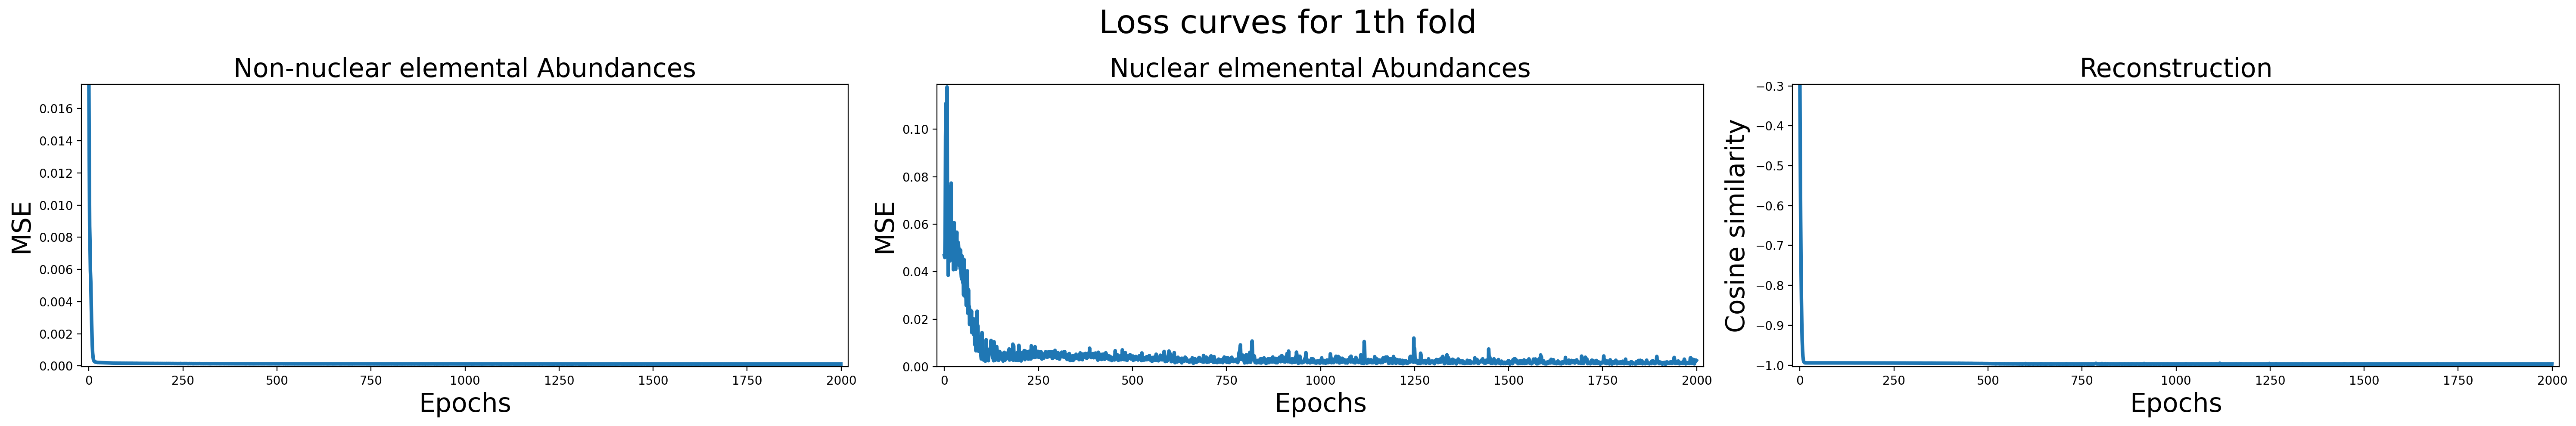

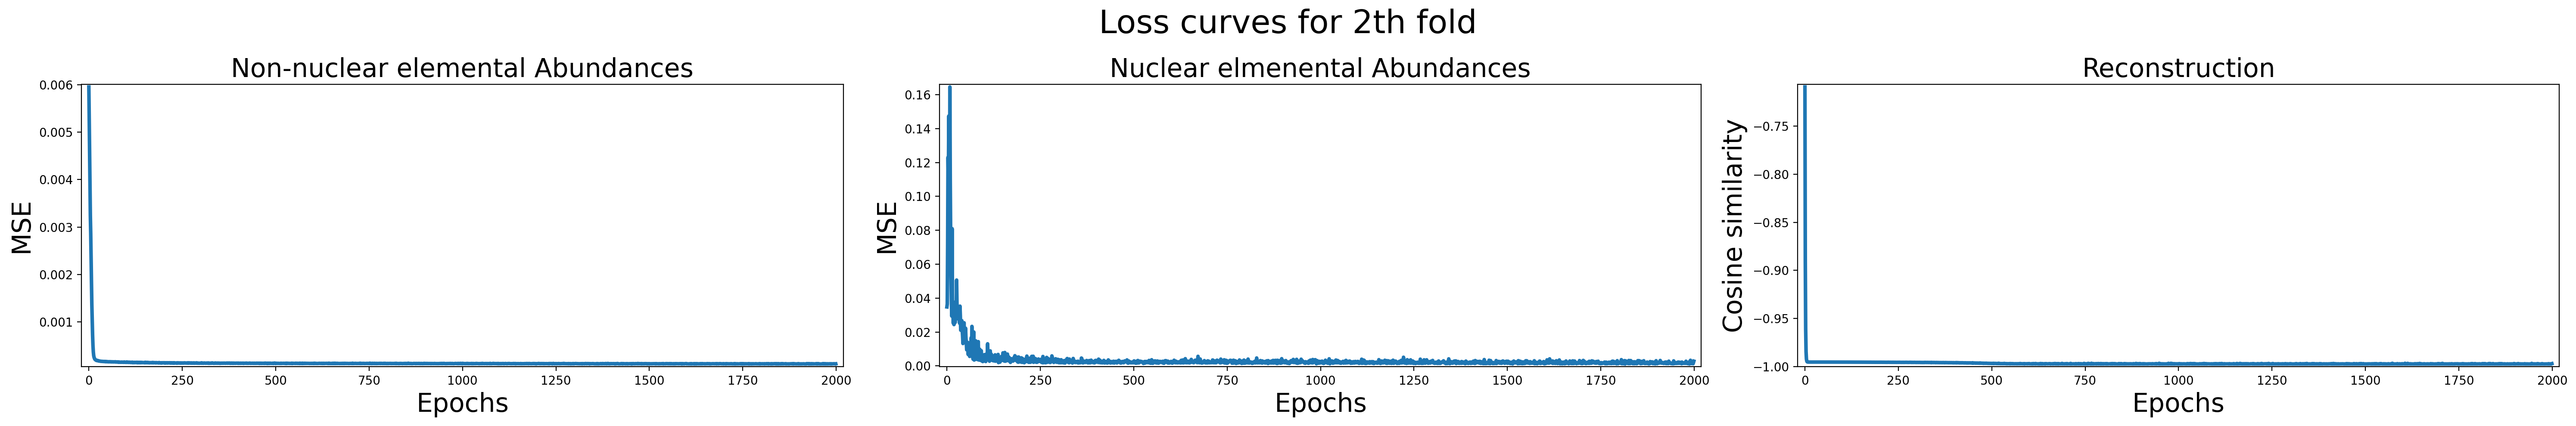

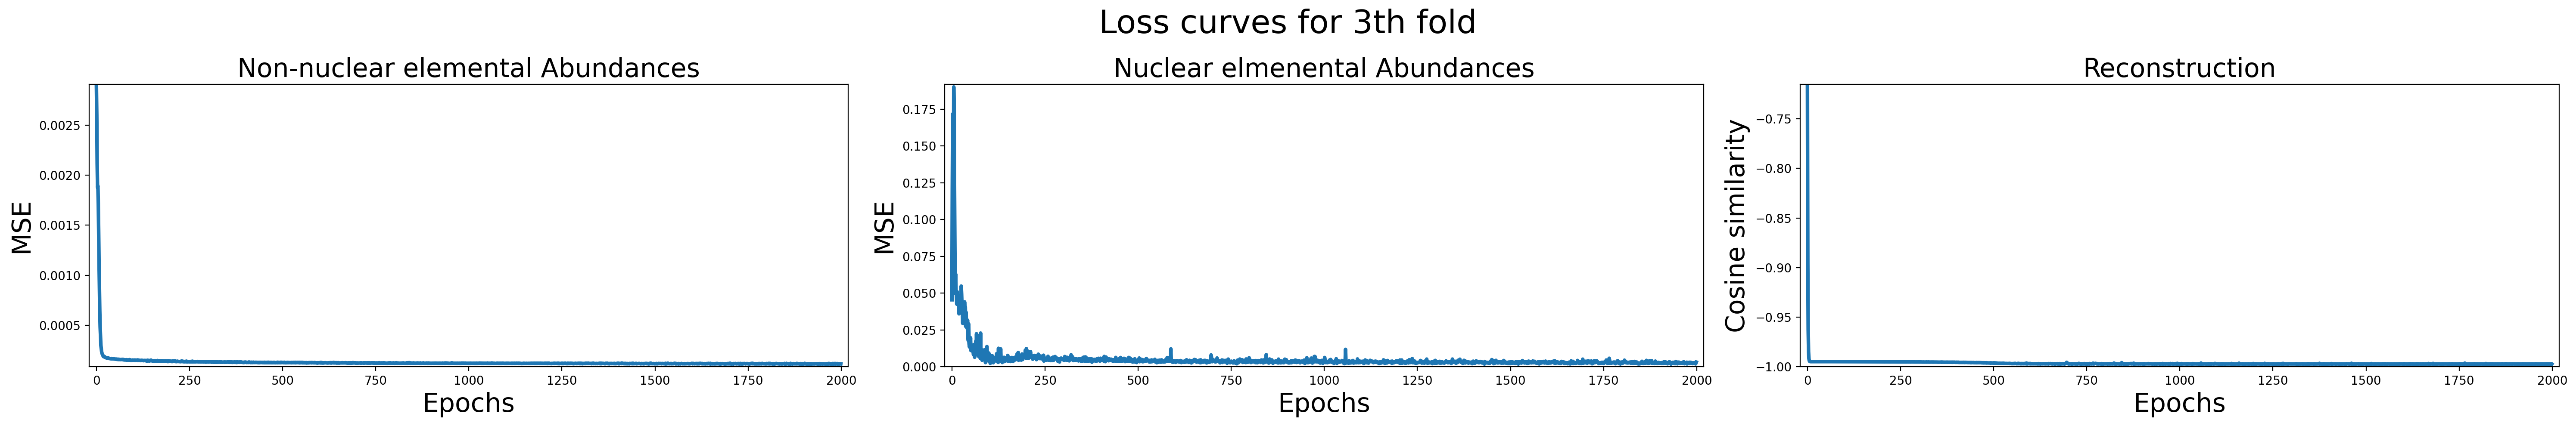

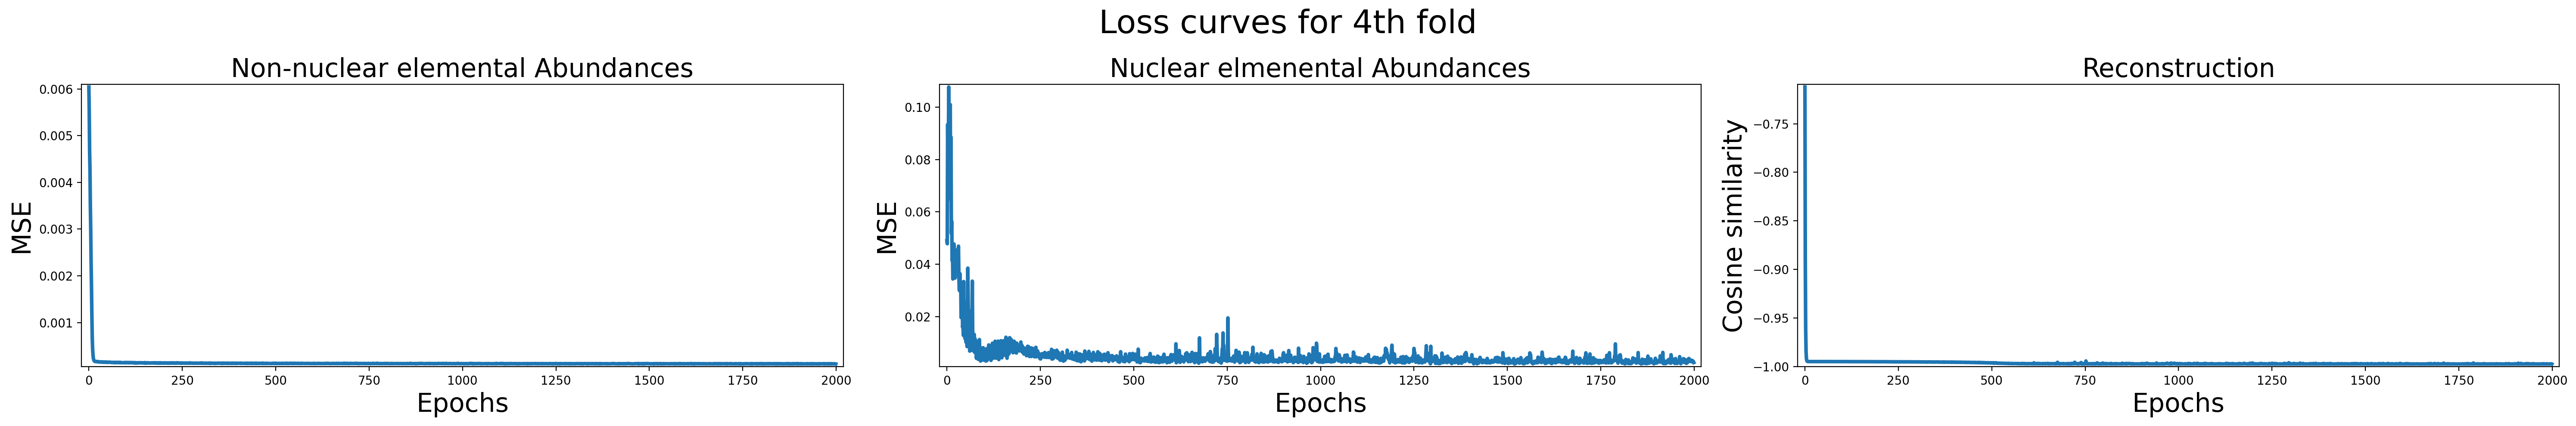

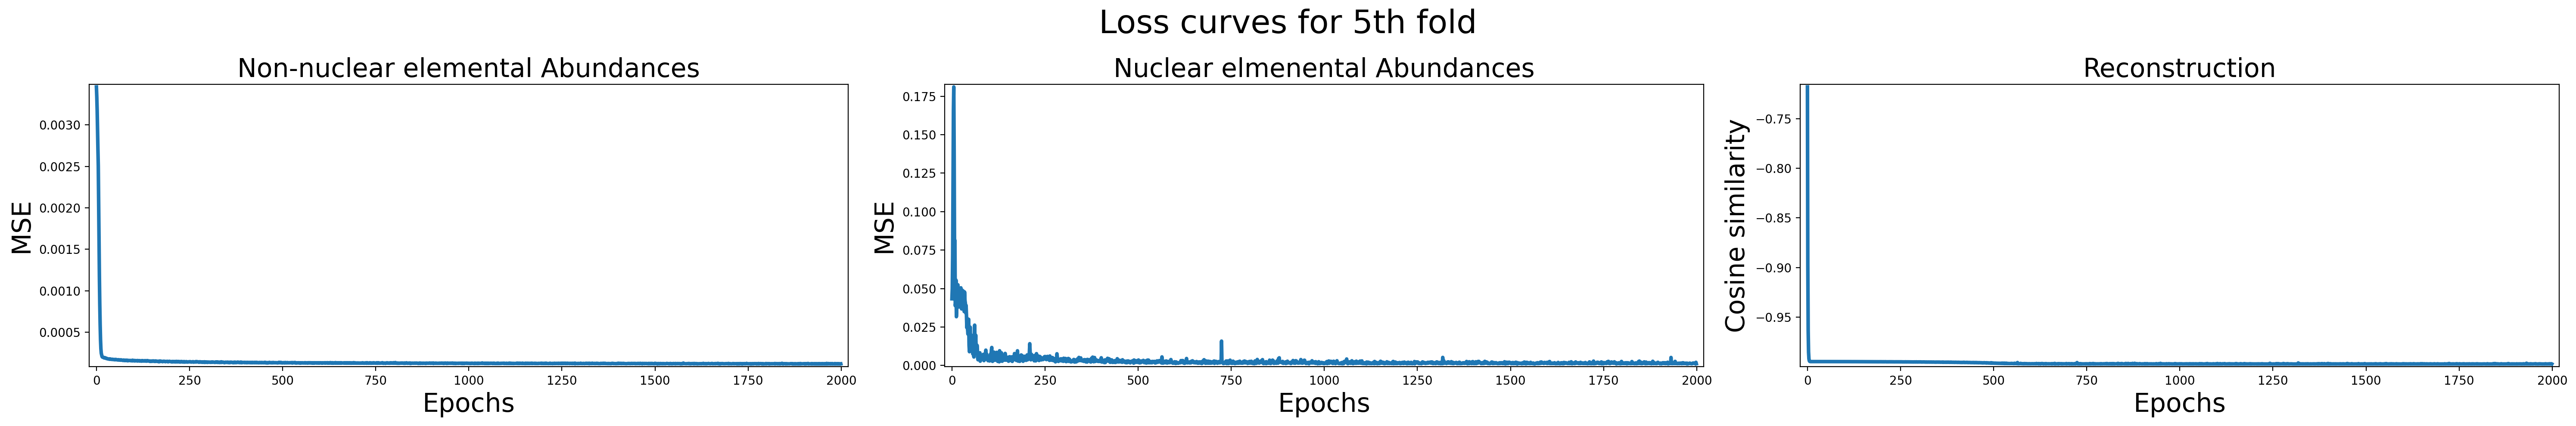

In [60]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #get the trained model for the current fold
    currentFoldModel=trainedModels[i]
    #get the current folds training history
    currenFoldTrainingHistory=modelTrainingHistories[i].history
    #get the validation losses
    regularAbundanceLoss=currenFoldTrainingHistory['val_tf.math.divide_loss']
    nuclearAbundanceLoss=currenFoldTrainingHistory['val_tf.math.abs_1_loss']
    reconstructionLoss=currenFoldTrainingHistory['val_Reconstruced_Spectra_loss']
    #plot the loss curves
    #create a figure 
    figure,axes=plt.subplots(nrows=1,
                             ncols=3,
                             figsize=(30,5),
                             dpi=200)

    #plot the loss curve
    temp=axes[0].plot(regularAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[0].set_title("Non-nuclear elemental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[0].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[0].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[0].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[1].plot(nuclearAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[1].set_title("Nuclear elmenental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[1].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[1].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[1].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[2].plot(reconstructionLoss,
                      lw=3)
    #set the title of the figure
    axes[2].set_title("Reconstruction",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[2].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[2].set_ylabel("Cosine similarity",fontsize=baseFontSize*1.2)
    #set the margin
    axes[2].margins(0.01)

    #add a title
    figure.suptitle(f"Loss curves for {i+1}th fold",
                    fontsize=baseFontSize*1.5)
    #adjust the layout
    plt.tight_layout()